In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Original Dataset.csv')
df.shape

(1106, 17)

In [3]:
df.head()

,Name,Age,Gender,TO,TH,AH,BH,OX2,OXK,OX9,A,M,Rickettsia_Suspect,Acute_typhoid,Paratyphoid_A,Paratyphoid_B,Typhoid
0,gAAAAABogxzS5EEbf73hk5aCmUTW-sZm7JguQy991RjGTP...,5y,Male,"""1:80""","""1:80""","""1:80""","""1:80""","""1:320""","""1:320""","""1:80""","""1:80""","""1:80""",Yes,No,No,No,Negative
1,gAAAAABogxzSPxqjjXarnFAQwWiRBMIfqcWILZNj1Kco4t...,3.5y,Male,"""1:160""","""1:80""","""1:80""","""1:80""",NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,No,Minimal
2,gAAAAABogxzSXhet-9e_mniQeaztJLKicAOe-sBhQhKt-G...,45y,Male,"""1:80""","""1:80""","""1:80""","""1:80""","""1:160""","""1:160""","""1:80""",NaN,NaN,Yes,No,No,No,Negative
3,gAAAAABogxzSEeL63vvluPQgs7voTJeL-H3Aus-MMeO-X4...,13y,Female,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:320""","""1:80""","""1:80""","""1:160""",Yes,No,No,No,Minimal
4,gAAAAABogxzSqjG6cpo0dqBciuhJf4axeyfgArg5dLYZAh...,12y,Female,"""1:160""","""1:320""","""1:80""","""1:80""","""1:160""","""1:160""","""1:320""","""1:80""","""1:80""",Yes,Yes,No,No,Positive


In [4]:
df.shape

(1106, 17)

In [5]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
TO,6
TH,6
AH,6
BH,6
OX2,397
OXK,397
OX9,397


In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

In [7]:
numeric_columns

Index([], dtype='object')

In [8]:
non_numeric_columns

Index(['Name', 'Age', 'Gender', 'TO', 'TH', 'AH', 'BH', 'OX2', 'OXK', 'OX9',
       'A', 'M', 'Rickettsia_Suspect', 'Acute_typhoid ', 'Paratyphoid_A ',
       'Paratyphoid_B', 'Typhoid'],
      dtype='object')

In [9]:
df = df.dropna(how='any')

In [10]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
TO,0
TH,0
AH,0
BH,0
OX2,0
OXK,0
OX9,0


In [12]:
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.head()

,Name,Age,Gender,TO,TH,AH,BH,OX2,OXK,OX9,A,M,Rickettsia_Suspect,Acute_typhoid,Paratyphoid_A,Paratyphoid_B,Typhoid
0,gAAAAABogxzS5EEbf73hk5aCmUTW-sZm7JguQy991RjGTP...,5y,Male,"""1:80""","""1:80""","""1:80""","""1:80""","""1:320""","""1:320""","""1:80""","""1:80""","""1:80""",Yes,No,No,No,Negative
3,gAAAAABogxzSEeL63vvluPQgs7voTJeL-H3Aus-MMeO-X4...,13y,Female,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:320""","""1:80""","""1:80""","""1:160""",Yes,No,No,No,Minimal
4,gAAAAABogxzSqjG6cpo0dqBciuhJf4axeyfgArg5dLYZAh...,12y,Female,"""1:160""","""1:320""","""1:80""","""1:80""","""1:160""","""1:160""","""1:320""","""1:80""","""1:80""",Yes,Yes,No,No,Positive
5,gAAAAABogxzSe-v0lhAjNb0YZRelG_PJcyuClEz6dUmAV0...,50y,Male,"""1:80""","""1:80""","""1:80""","""1:80""","""1:160""","""1:160""","""1:80""","""1:80""","""1:160""",Yes,No,No,No,Negative
7,gAAAAABogxzSwEihBK6vClq_YoYLqJT3dB-3NZ0jC8nj5v...,30y,Male,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:80""","""1:160""","""1:80""","""1:80""",Yes,No,No,No,Minimal


In [14]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
columns_to_encode = [
   'Name', 'Age', 'Gender','Rickettsia_Suspect', 'Acute_typhoid ', 'Paratyphoid_A ',
       'Paratyphoid_B', 'Typhoid']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [15]:
df.head()

,Name,Age,Gender,TO,TH,AH,BH,OX2,OXK,OX9,A,M,Rickettsia_Suspect,Acute_typhoid,Paratyphoid_A,Paratyphoid_B,Typhoid
0,67,68,1,"""1:80""","""1:80""","""1:80""","""1:80""","""1:320""","""1:320""","""1:80""","""1:80""","""1:80""",1,0,0,0,1
3,142,7,0,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:320""","""1:80""","""1:80""","""1:160""",1,0,0,0,0
4,550,6,0,"""1:160""","""1:320""","""1:80""","""1:80""","""1:160""","""1:160""","""1:320""","""1:80""","""1:80""",1,1,0,0,2
5,399,59,1,"""1:80""","""1:80""","""1:80""","""1:80""","""1:160""","""1:160""","""1:80""","""1:80""","""1:160""",1,0,0,0,1
7,612,37,1,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:80""","""1:160""","""1:80""","""1:80""",1,0,0,0,0


In [16]:
df.head()

,Name,Age,Gender,TO,TH,AH,BH,OX2,OXK,OX9,A,M,Rickettsia_Suspect,Acute_typhoid,Paratyphoid_A,Paratyphoid_B,Typhoid
0,67,68,1,"""1:80""","""1:80""","""1:80""","""1:80""","""1:320""","""1:320""","""1:80""","""1:80""","""1:80""",1,0,0,0,1
3,142,7,0,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:320""","""1:80""","""1:80""","""1:160""",1,0,0,0,0
4,550,6,0,"""1:160""","""1:320""","""1:80""","""1:80""","""1:160""","""1:160""","""1:320""","""1:80""","""1:80""",1,1,0,0,2
5,399,59,1,"""1:80""","""1:80""","""1:80""","""1:80""","""1:160""","""1:160""","""1:80""","""1:80""","""1:160""",1,0,0,0,1
7,612,37,1,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:80""","""1:160""","""1:80""","""1:80""",1,0,0,0,0


In [17]:
titer_cols = ['TO', 'TH', 'AH', 'BH', 'OX2', 'OXK', 'OX9', 'A', 'M']

for col in titer_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('"', '', regex=False)
        .str.replace('1:', '', regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [18]:
print(df[titer_cols].head())


    TO   TH  AH  BH  OX2  OXK  OX9   A    M
0   80   80  80  80  320  320   80  80   80
3   80  160  80  80  160  320   80  80  160
4  160  320  80  80  160  160  320  80   80
5   80   80  80  80  160  160   80  80  160
7   80  160  80  80  160   80  160  80   80


In [19]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 1105
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Name                655 non-null    int64
 1   Age                 655 non-null    int64
 2   Gender              655 non-null    int64
 3   TO                  655 non-null    int64
 4   TH                  655 non-null    int64
 5   AH                  655 non-null    int64
 6   BH                  655 non-null    int64
 7   OX2                 655 non-null    int64
 8   OXK                 655 non-null    int64
 9   OX9                 655 non-null    int64
 10  A                   655 non-null    int64
 11  M                   655 non-null    int64
 12  Rickettsia_Suspect  655 non-null    int64
 13  Acute_typhoid       655 non-null    int64
 14  Paratyphoid_A       655 non-null    int64
 15  Paratyphoid_B       655 non-null    int64
 16  Typhoid             655 non-null    int64
dtypes

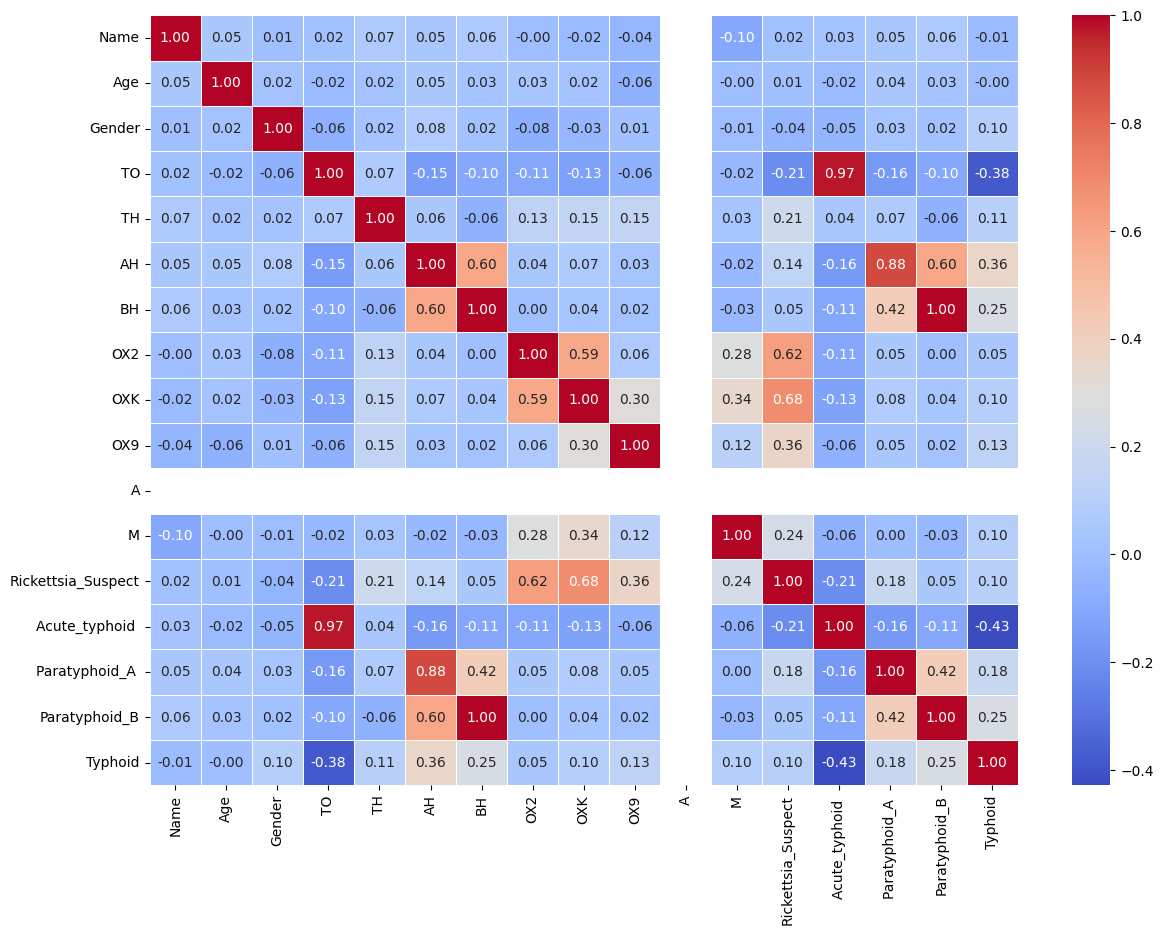

In [23]:
plt.figure(figsize=(14,10))

# Correlation calculation
corr_matrix = df.corr()

# Heatmap with values shown
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,        # 🔥 value দেখাবে
    fmt=".2f",         # 🔢 2 decimal পর্যন্ত
    linewidths=0.5
)

#plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()


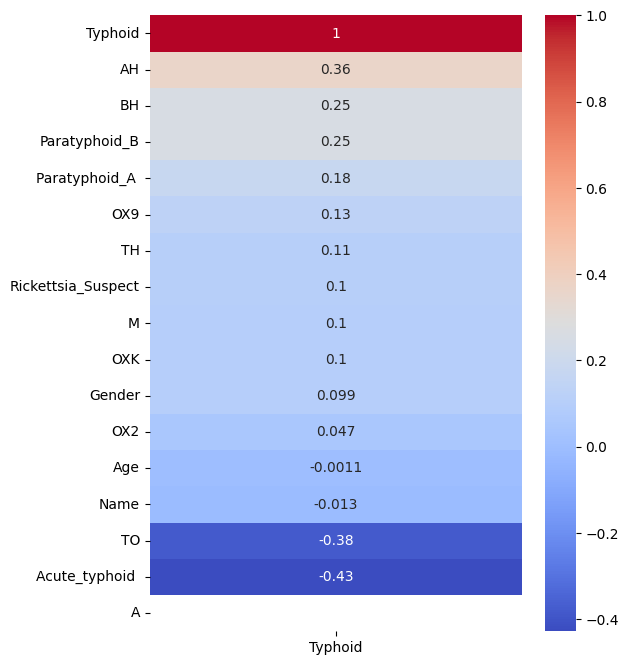

In [25]:

# Correlation with Target


plt.figure(figsize=(6,8))

target_corr = corr_matrix['Typhoid'].sort_values(ascending=False)

sns.heatmap(
    target_corr.to_frame(),
    annot=True,
    cmap='coolwarm'
)

#plt.title("Feature Correlation with Typhoid")
plt.show()


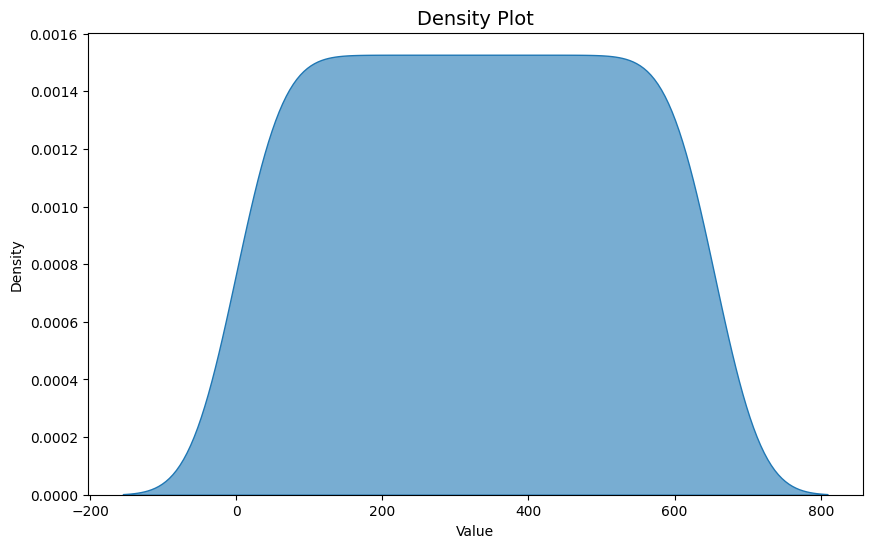

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.kdeplot(
    data=df,
    x='Name',   # এখানে তোমার column বসাও
    fill=True,
    alpha=0.6
)

plt.title("Density Plot", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


/tmp/ipython-input-82100406.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


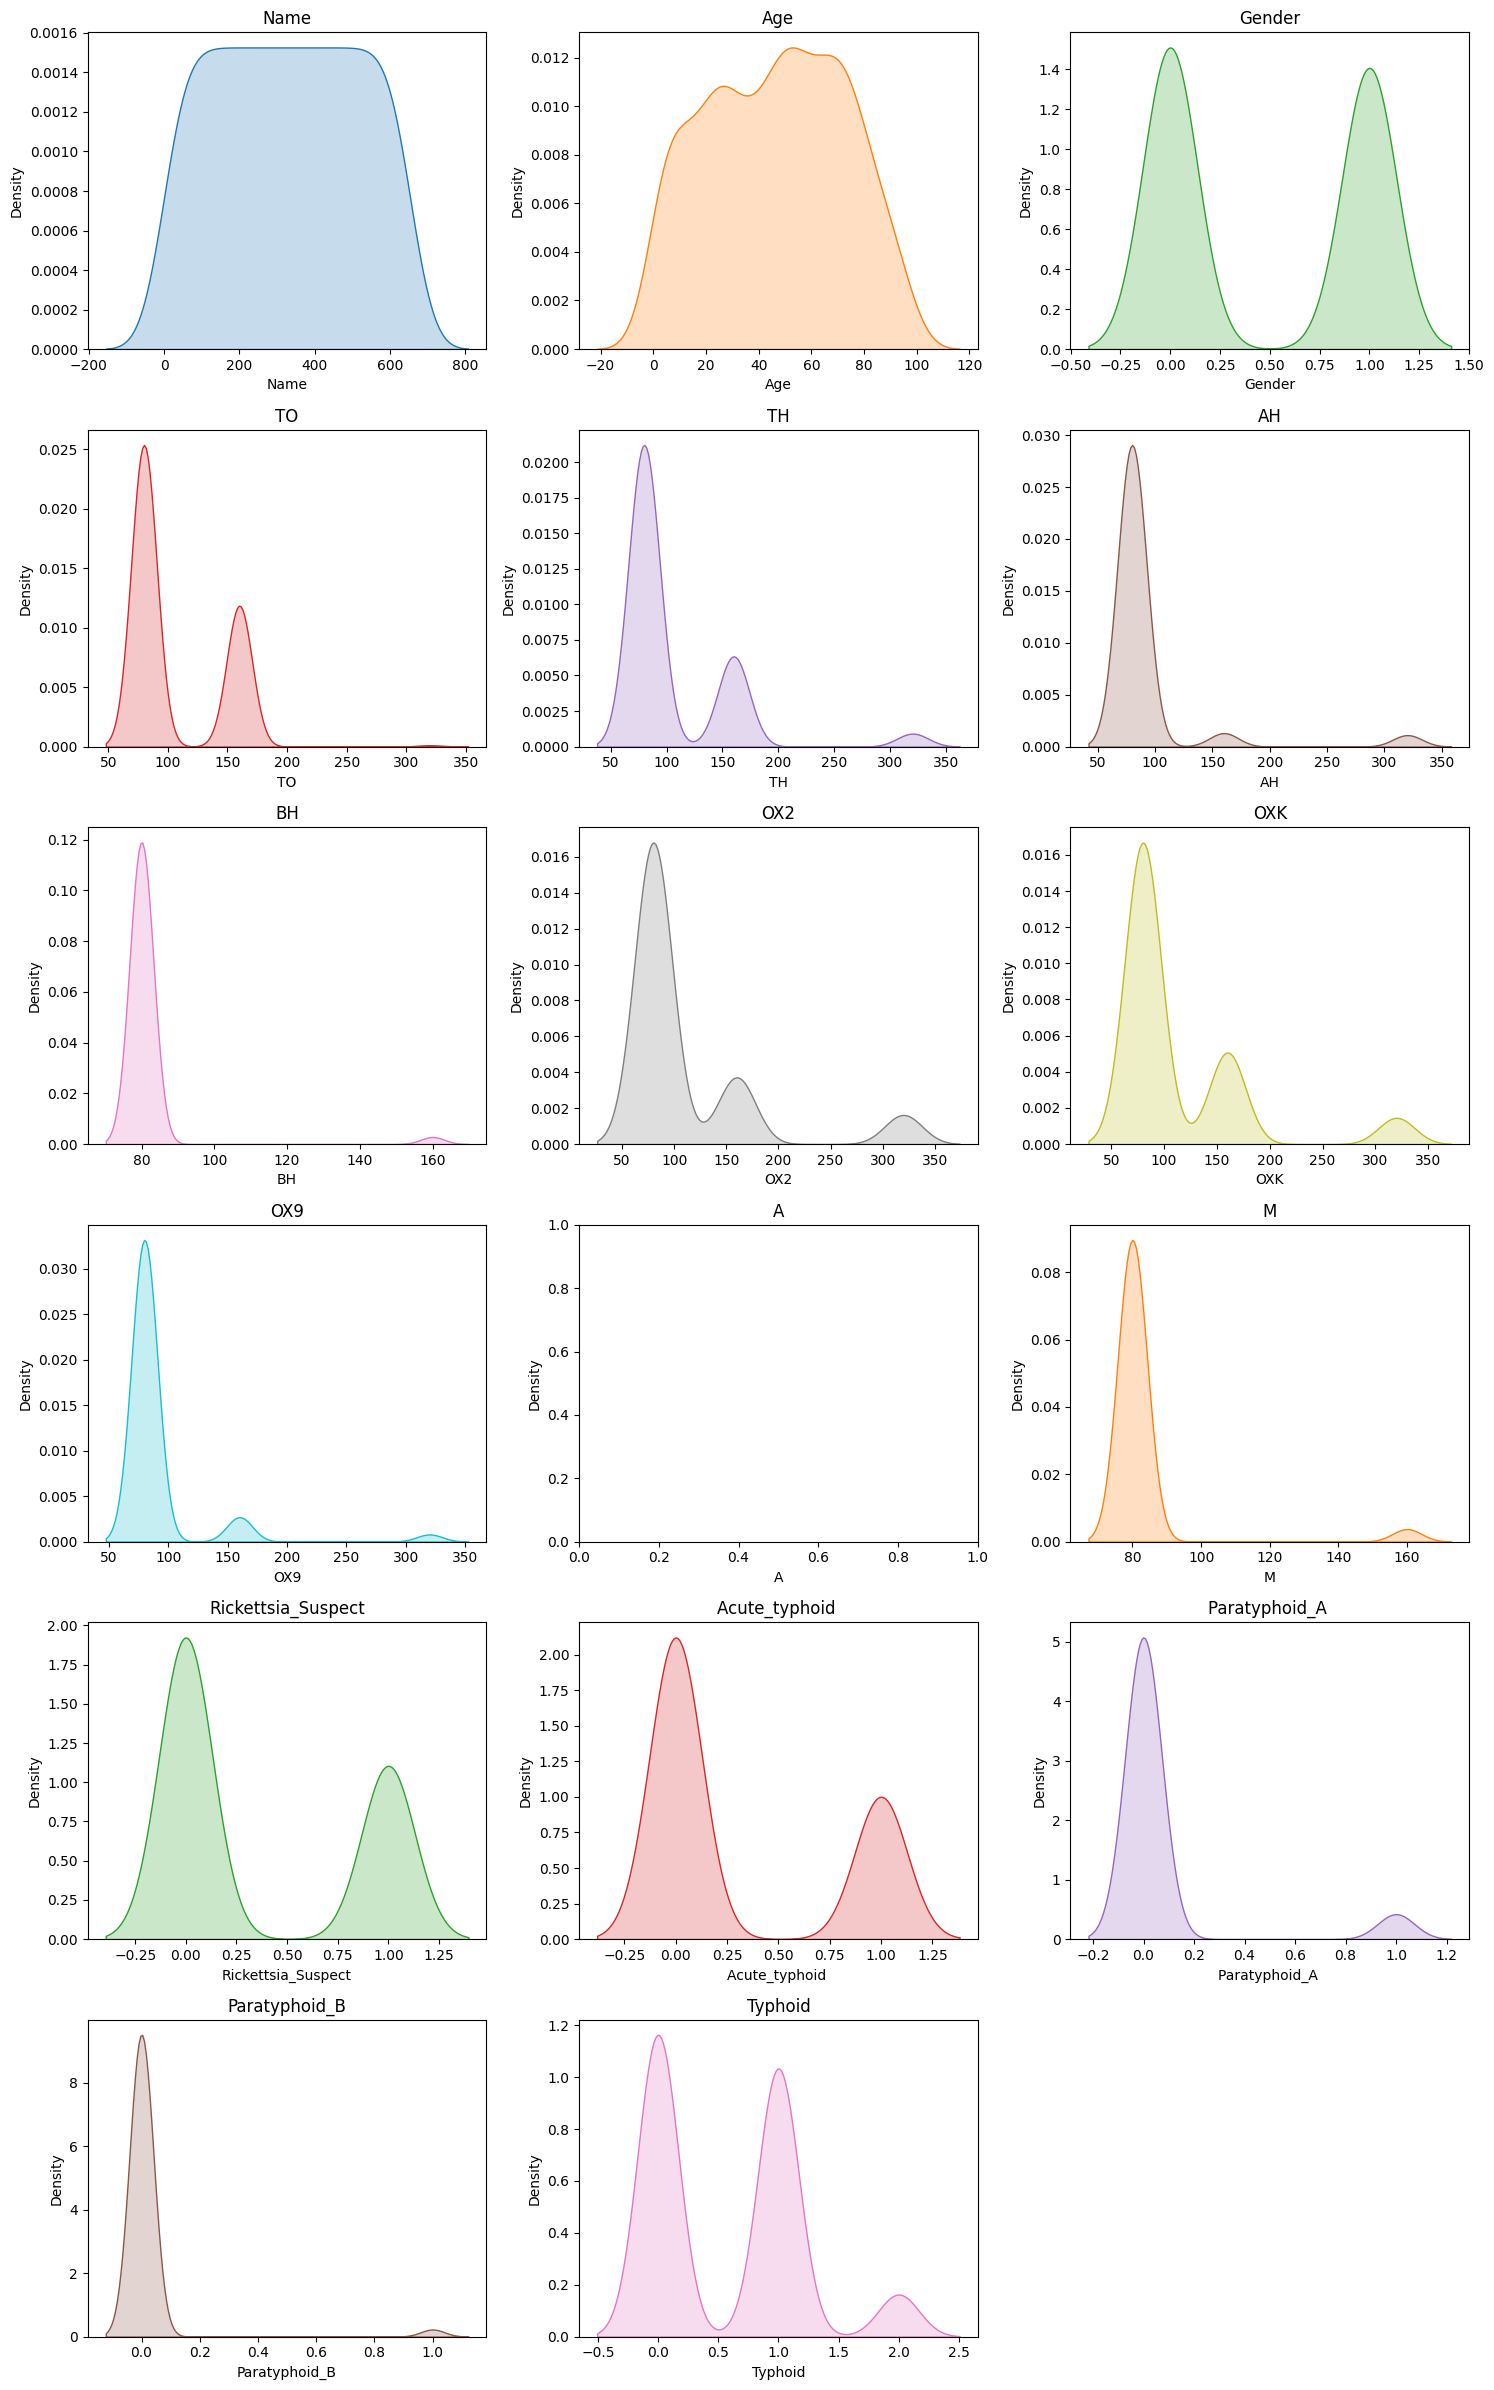

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

colors = sns.color_palette("tab10", len(num_cols))

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.kdeplot(
        df[col].dropna(),   # 🔥 missing value remove
        fill=True,
        color=colors[i]
    )

    plt.title(col)

plt.tight_layout()
plt.show()


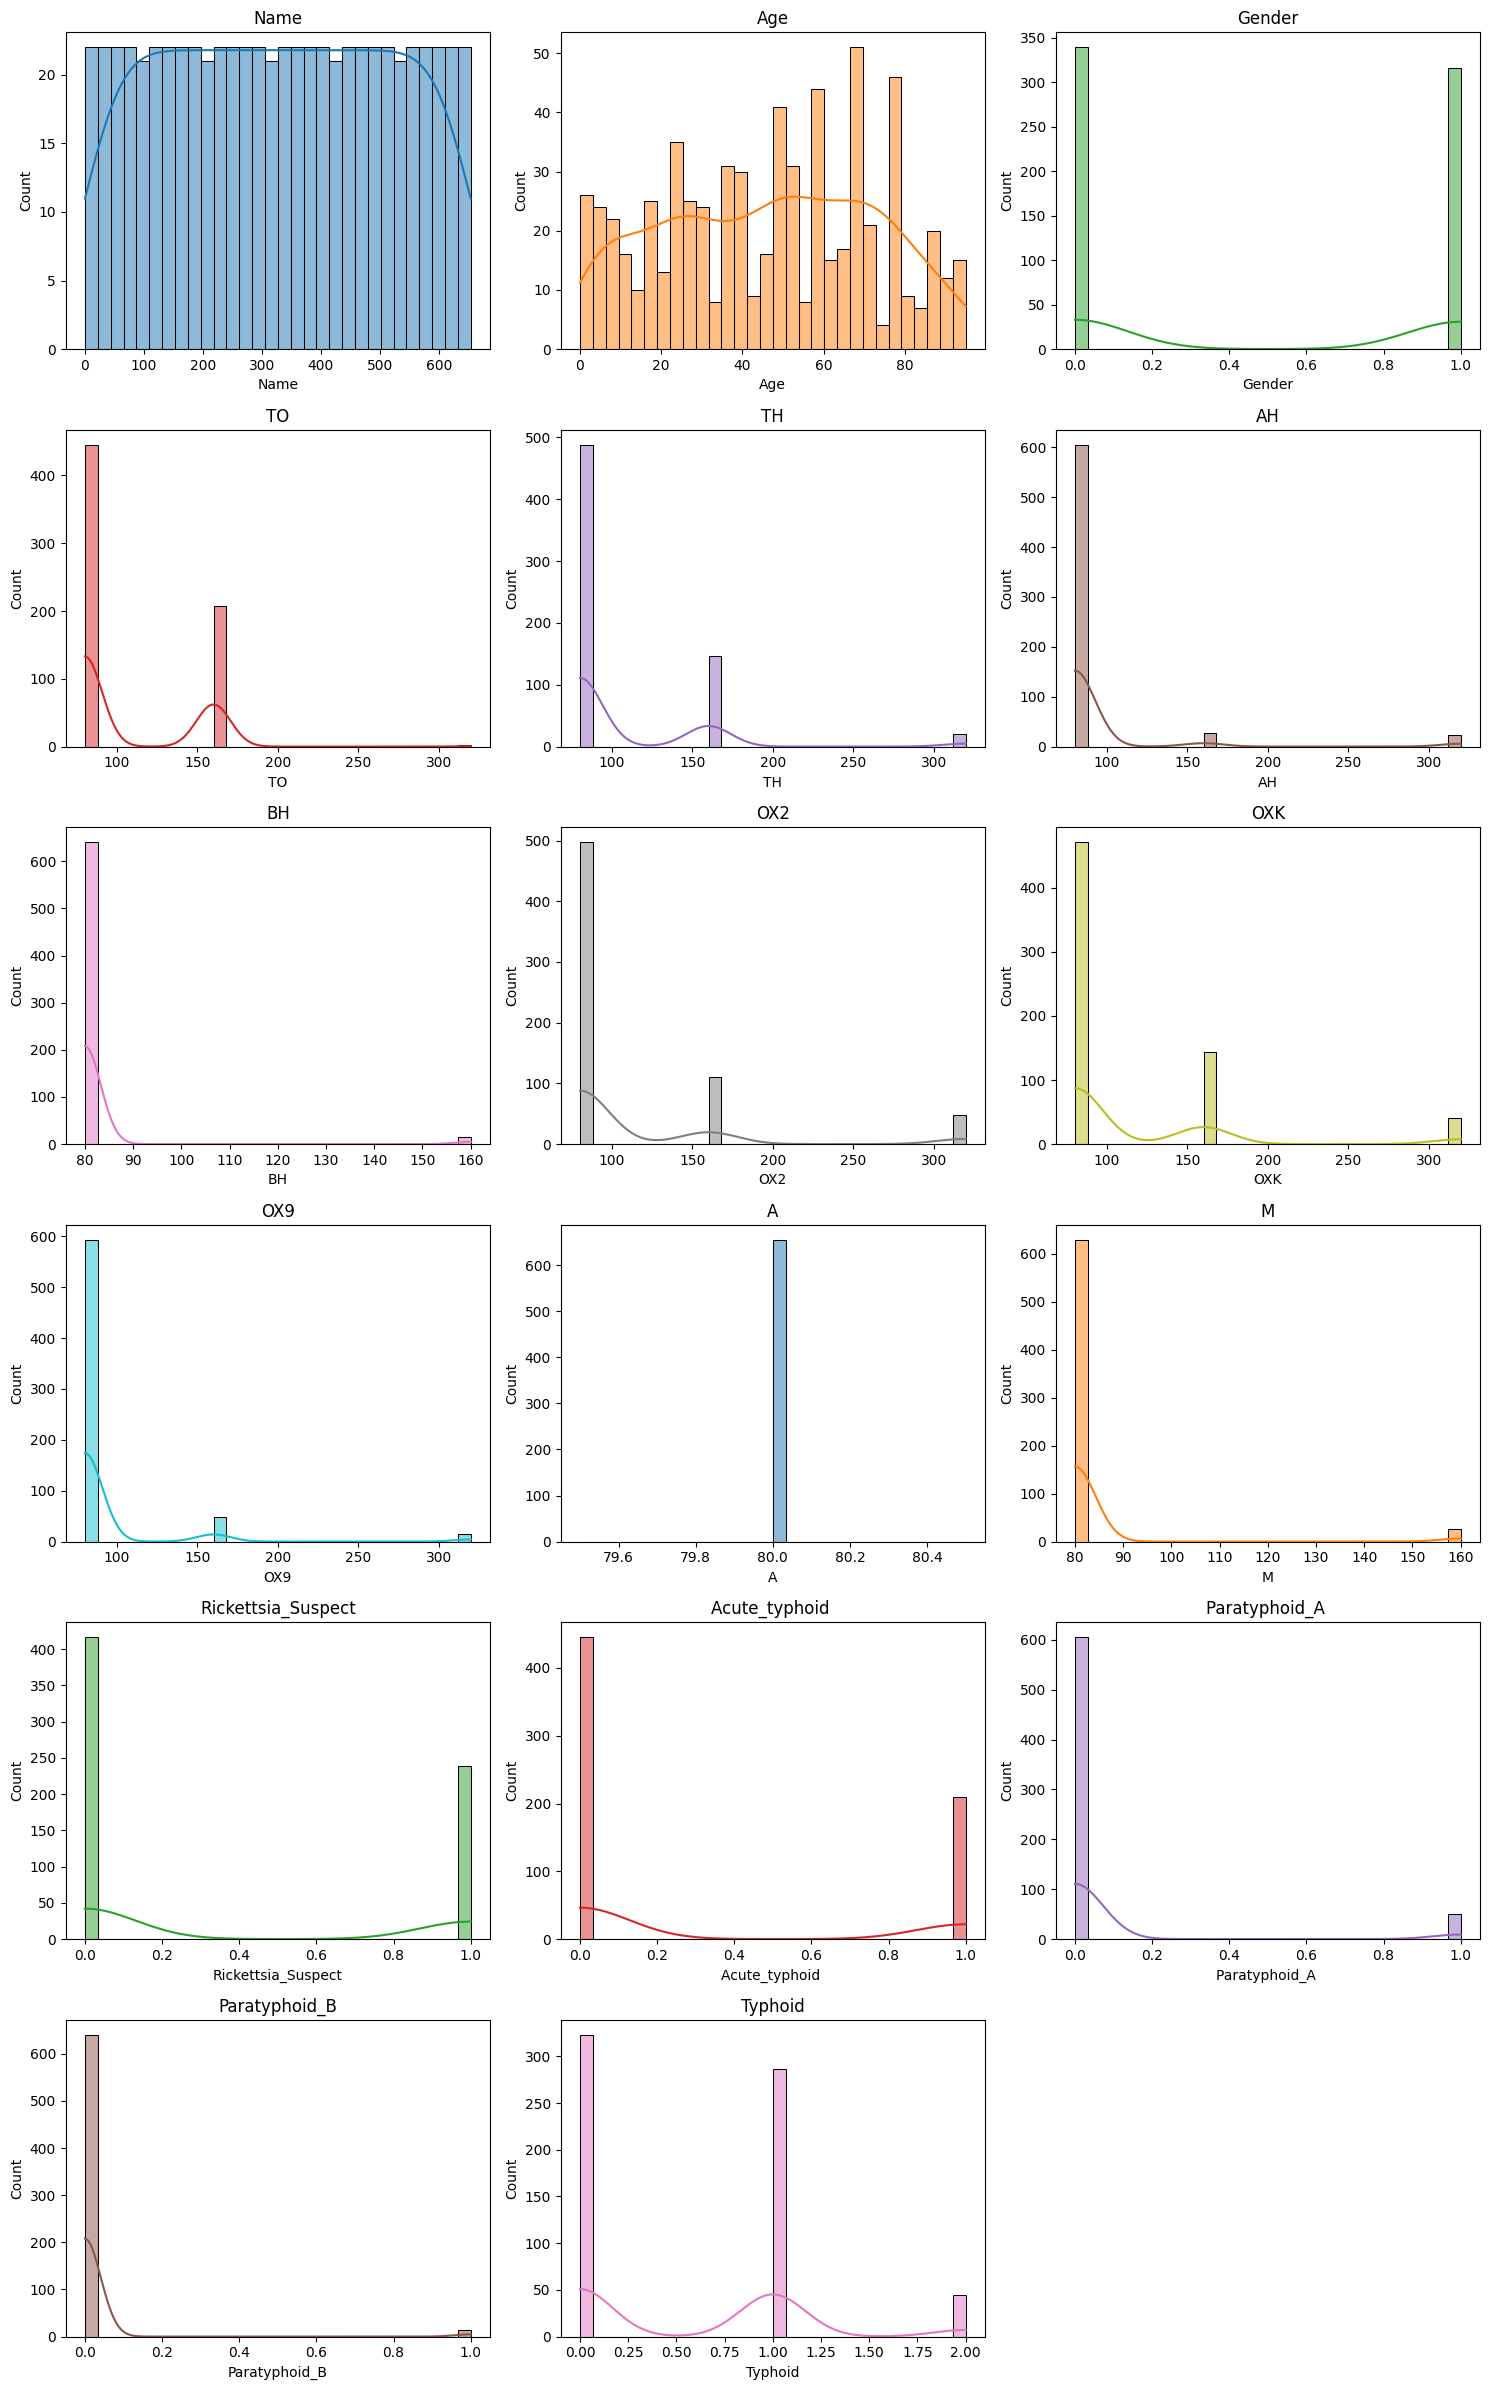

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

colors = sns.color_palette("tab10", len(num_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()   # 🔥 important

for i, col in enumerate(num_cols):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        color=colors[i],
        ax=axes[i]
    )
    axes[i].set_title(col)

# 🔥 extra empty plots remove
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


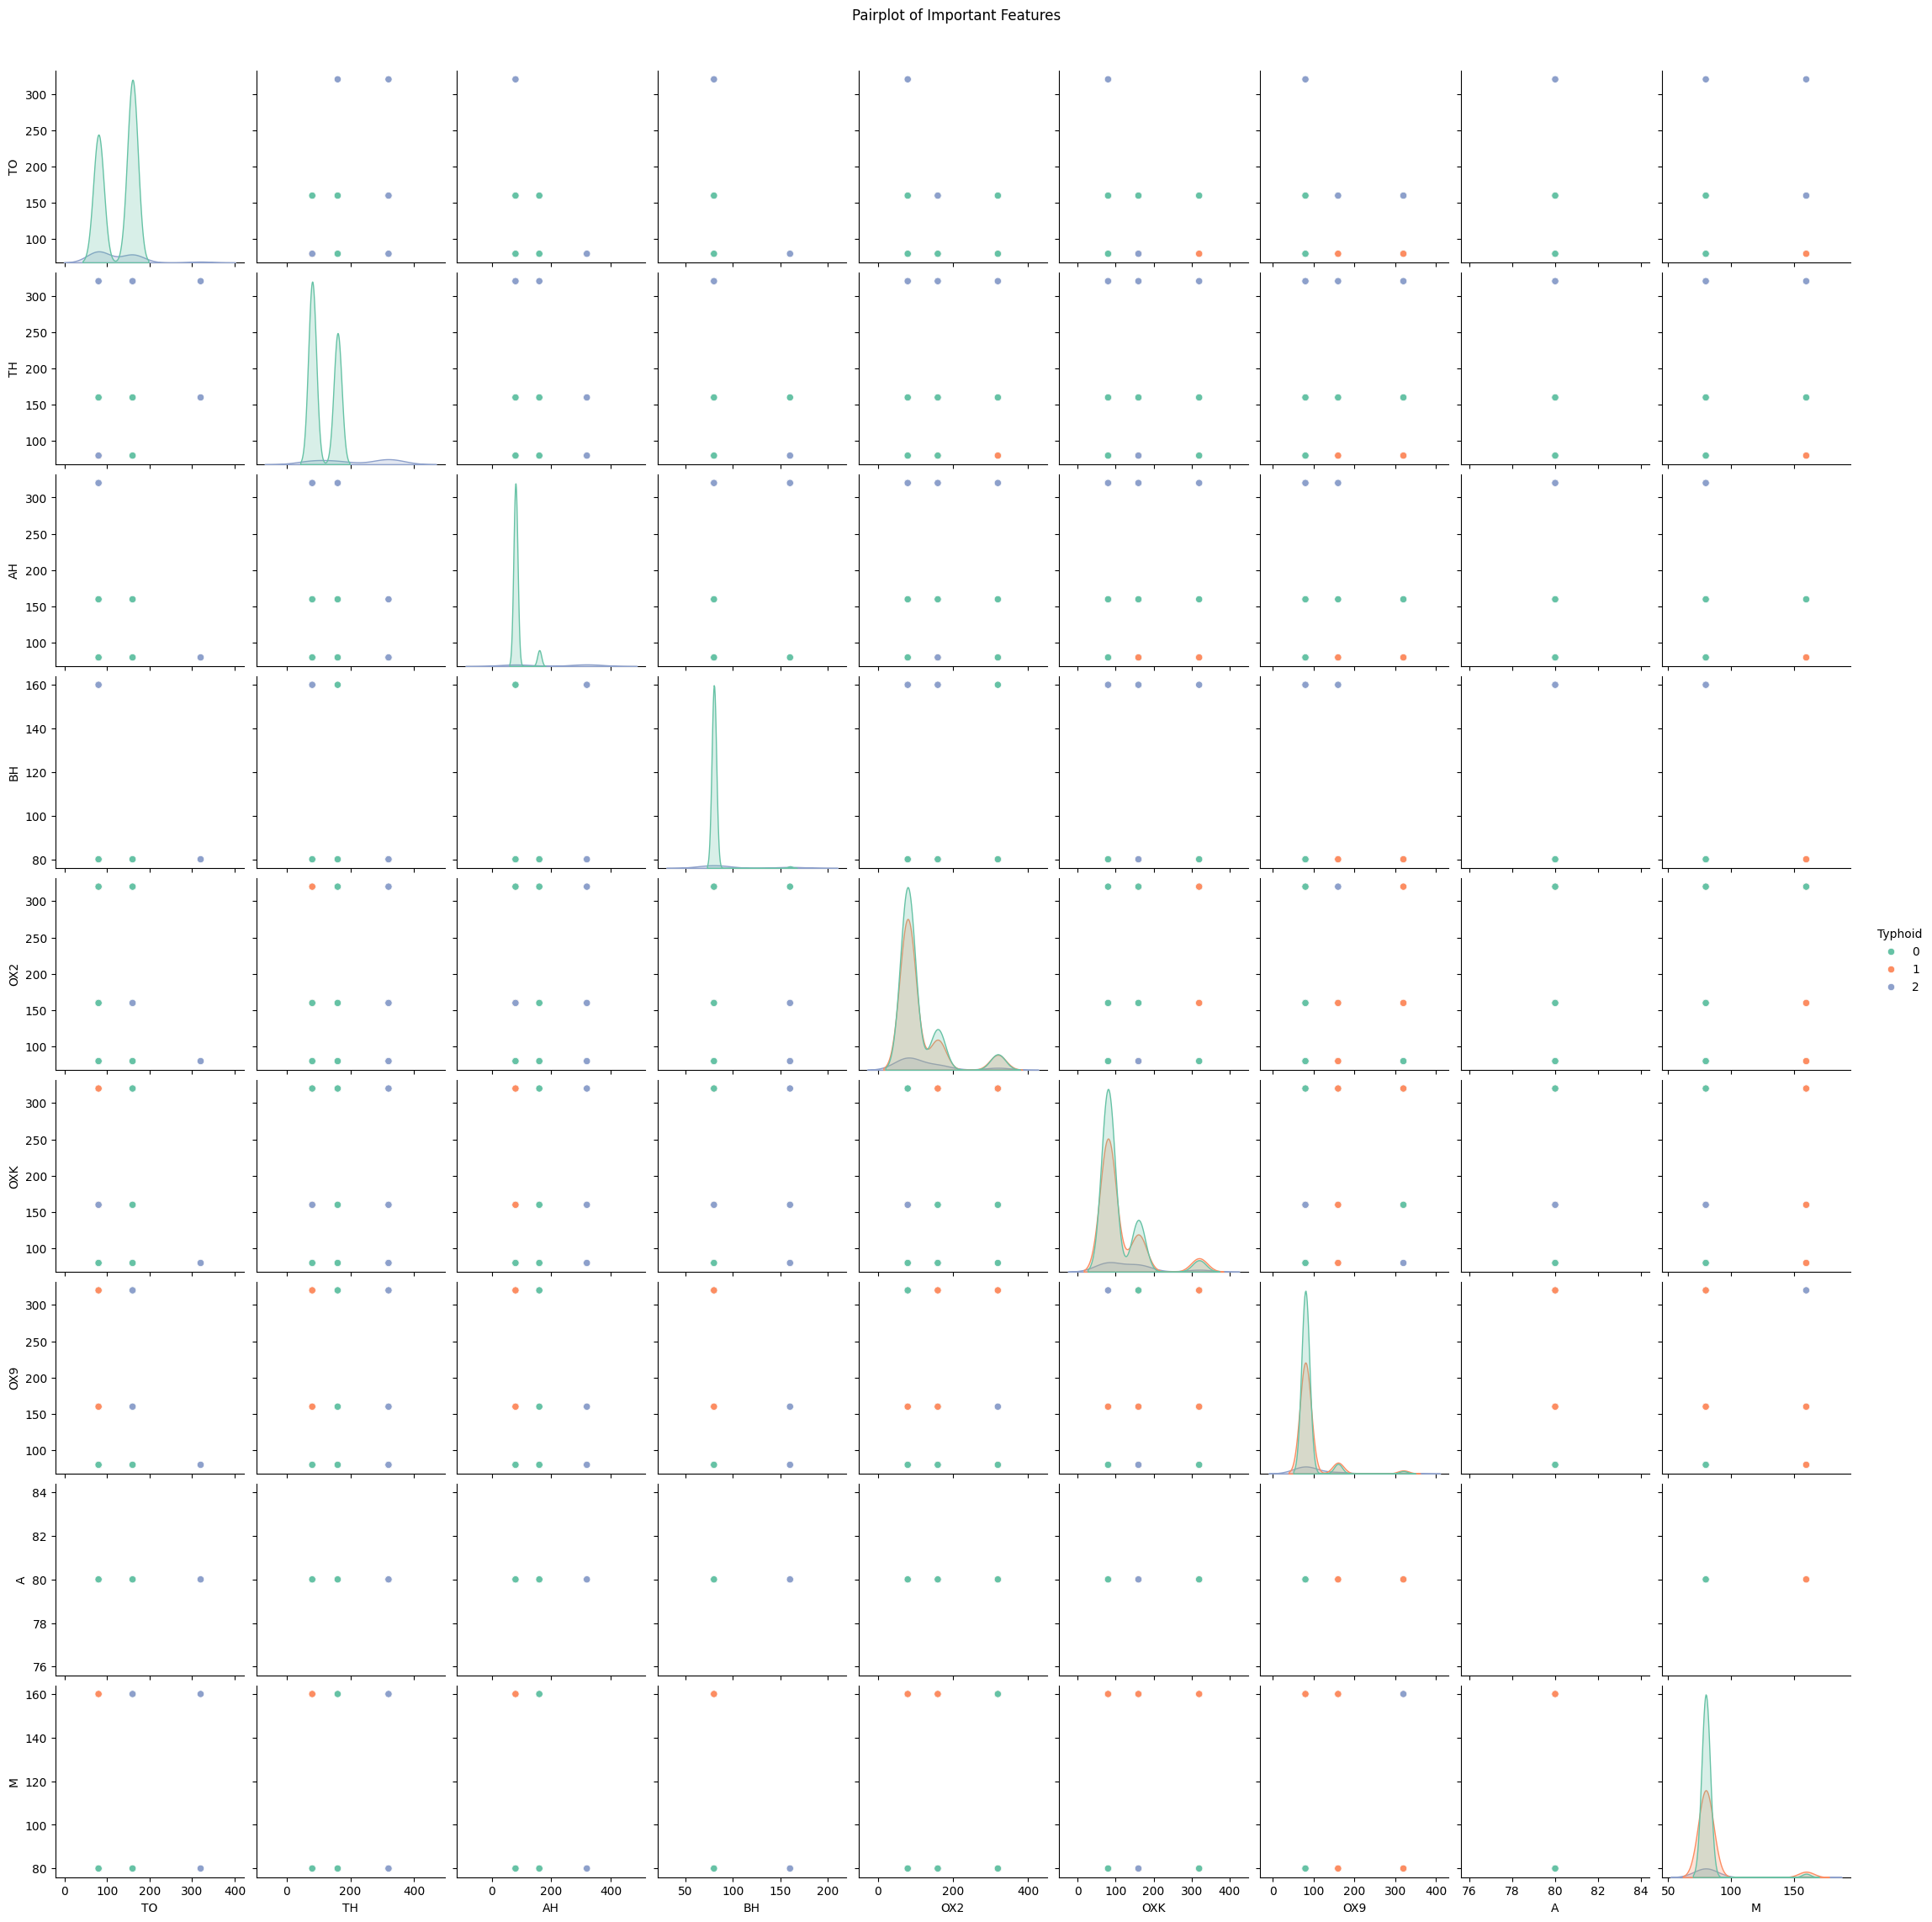

In [ ]:
# =========================
# Pairplot (EDA)
# =========================

selected_features = [
    'TO', 'TH', 'AH', 'BH',
    'OX2', 'OXK', 'OX9',
    'A', 'M',
    'Typhoid'
]

sns.pairplot(
    df[selected_features],
    hue='Typhoid',
    palette='Set2',
    diag_kind='kde'
)

plt.suptitle("Pairplot of Important Features", y=1.02)
plt.show()


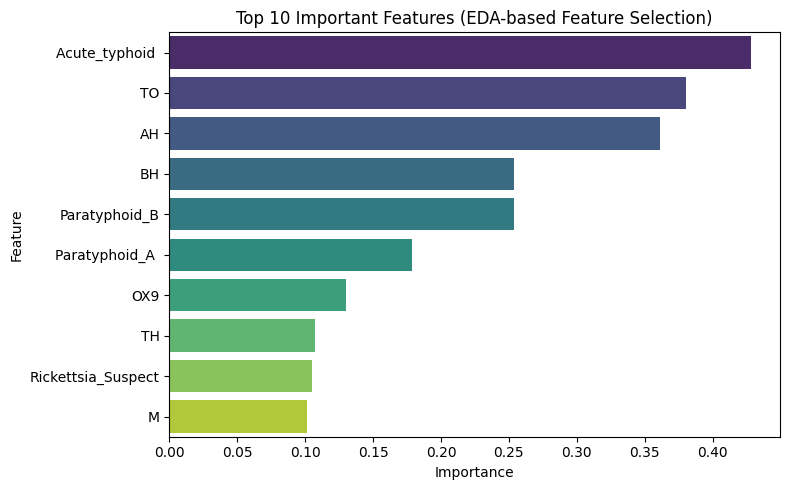

In [ ]:
# Assuming target_corr is available from previous execution (cell lEWh2261hQ1Q)
# Convert the correlation series to a DataFrame for plotting feature importance.
# We drop the target variable 'Typhoid' itself and use absolute values for importance.
feat_imp_df = target_corr.drop('Typhoid', errors='ignore').abs().reset_index()
feat_imp_df.columns = ['Feature', 'Importance']
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))

sns.barplot(
    data=feat_imp_df.head(10),
    x='Importance',
    y='Feature',
    hue='Feature', # Assign y variable to hue
    palette='viridis',
    legend=False # Set legend to False
)

plt.title("Top 10 Important Features (EDA-based Feature Selection)")
plt.tight_layout()
plt.show()


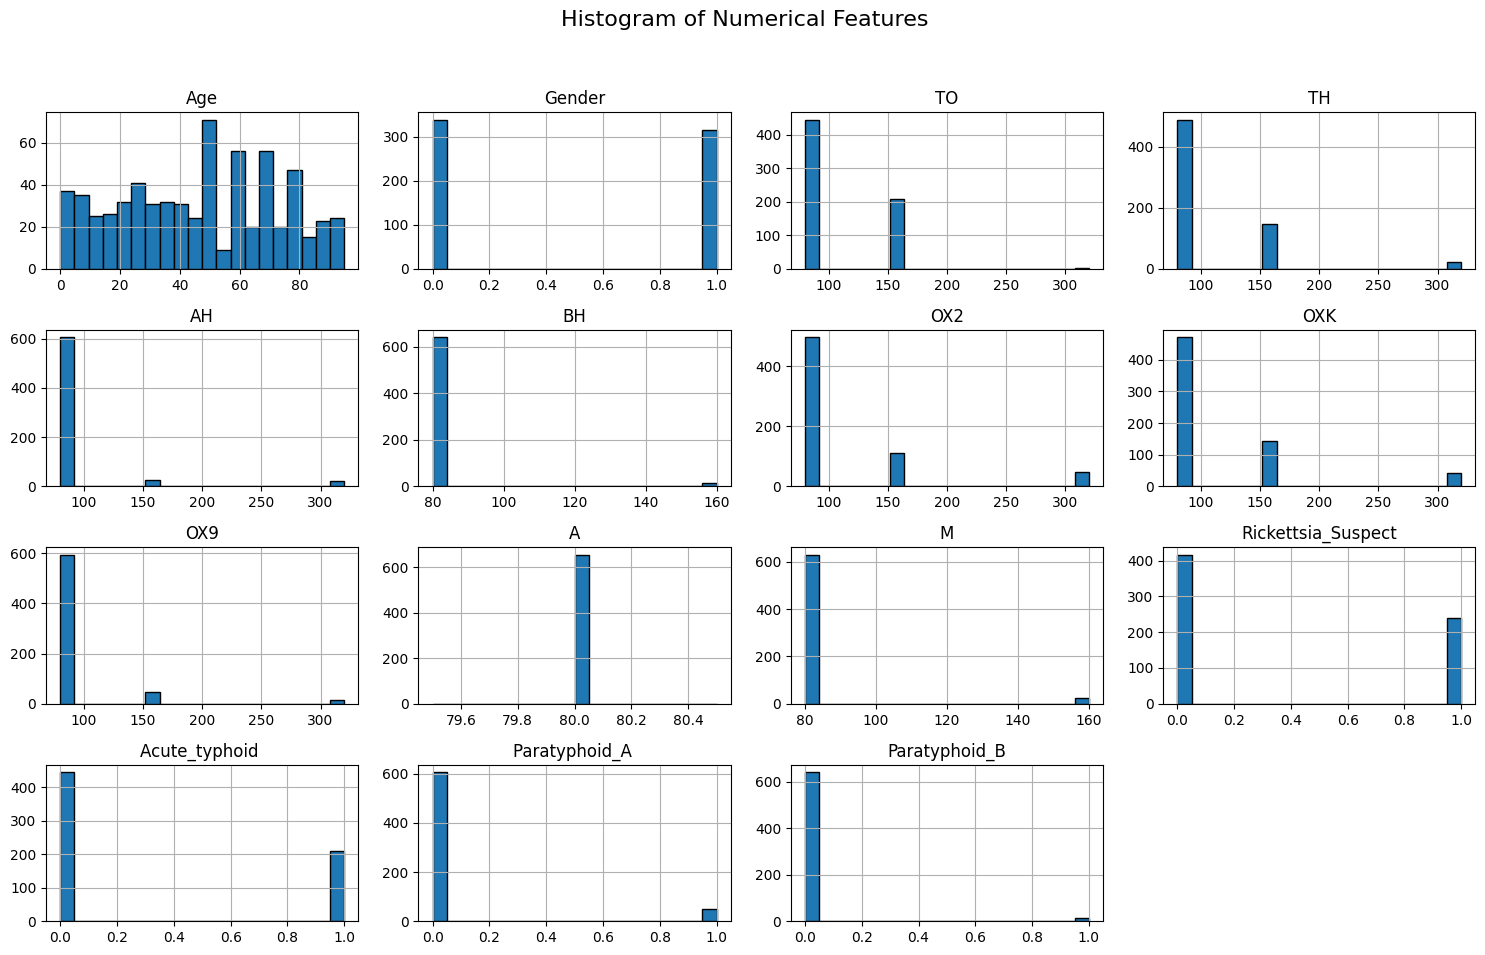

In [ ]:
# Histogram for Numerical Features

# Redefine numeric_columns after all transformations
numeric_columns_updated = df.select_dtypes(include=['number']).columns

# Filter out 'Name' as it's an ID and not typically useful for histograms
# Also filter out 'Typhoid' as it's the target variable
columns_to_plot = [col for col in numeric_columns_updated if col not in ['Name', 'Typhoid']]

df[columns_to_plot].hist(
    figsize=(15,10),
    bins=20,
    edgecolor='black'
)

plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()


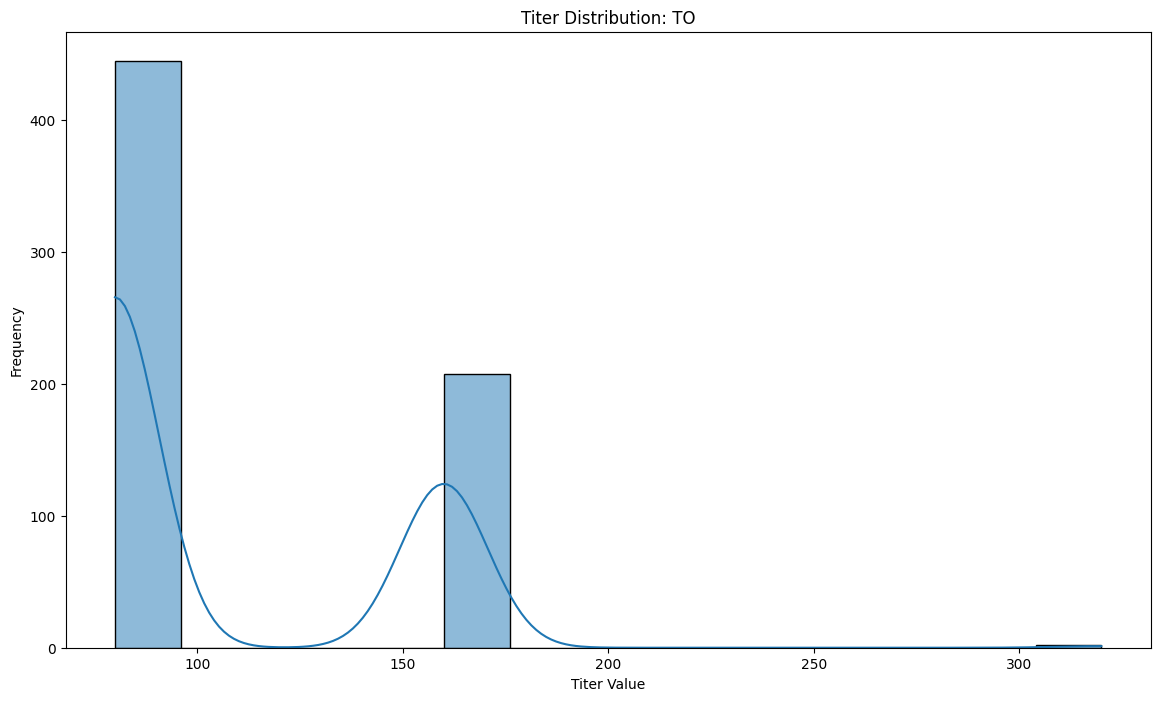

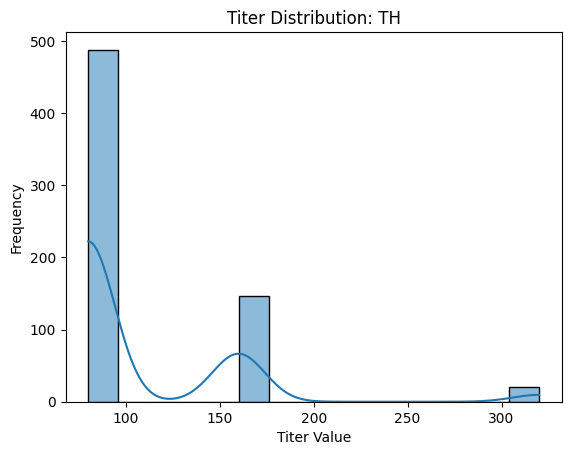

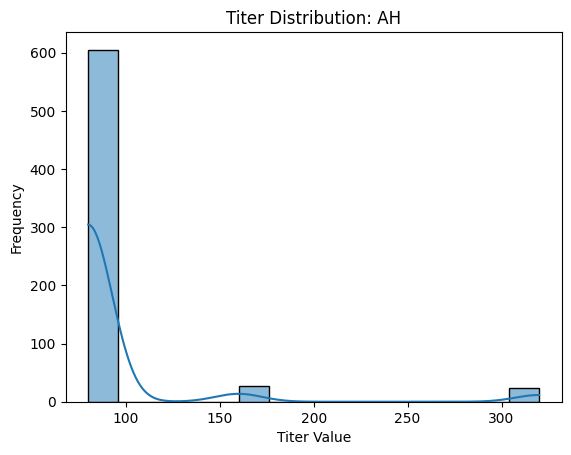

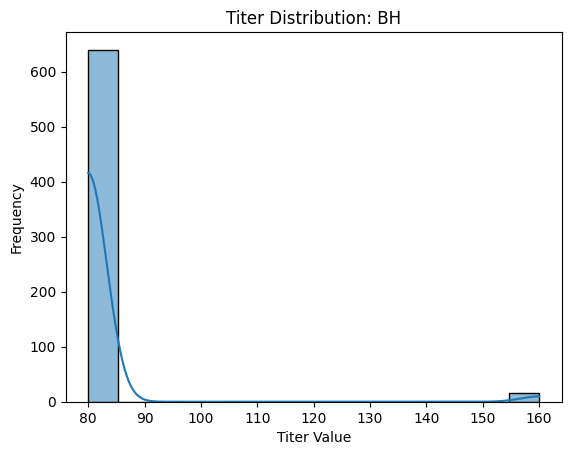

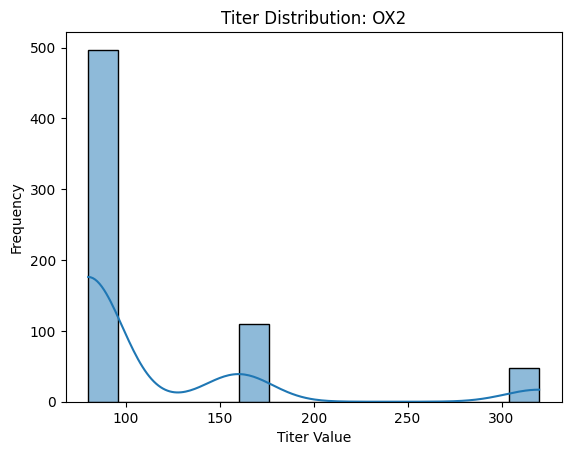

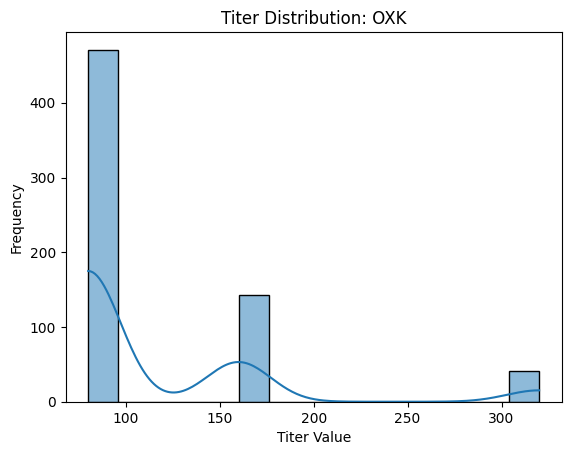

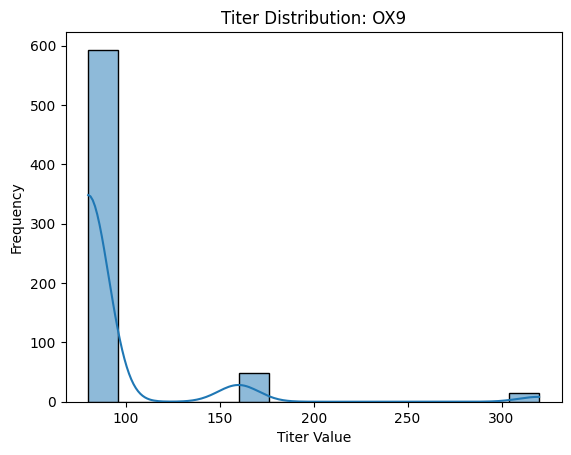

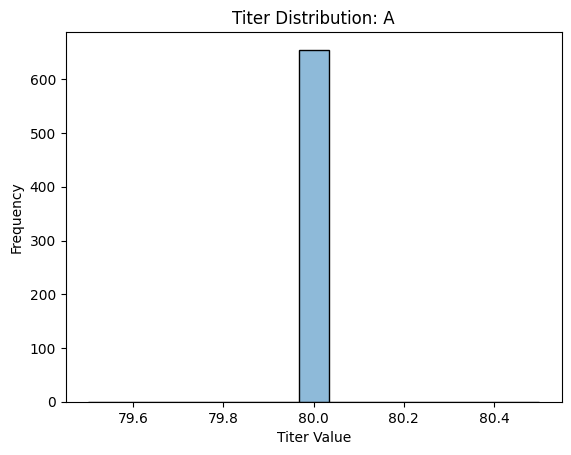

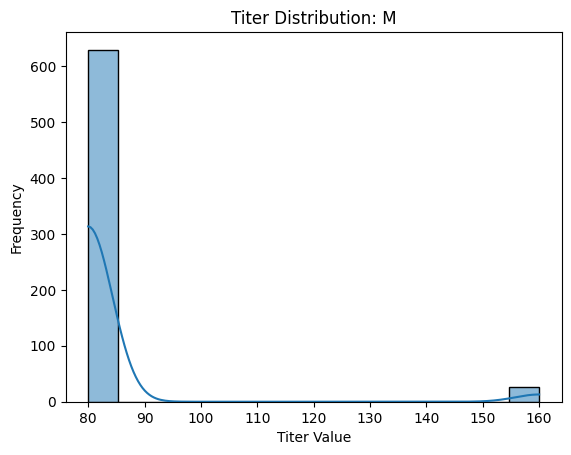

In [ ]:

# Histogram for Titer Columns


plt.figure(figsize=(14,8))

for col in titer_cols:
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f"Titer Distribution: {col}")
    plt.xlabel("Titer Value")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
x = df.drop(columns=['Typhoid'])
y = df['Typhoid']

In [ ]:
print(x)

      Name  Age  Gender   TO   TH  AH  BH  OX2  OXK  OX9   A    M  \
0       67   68       1   80   80  80  80  320  320   80  80   80   
3      142    7       0   80  160  80  80  160  320   80  80  160   
4      550    6       0  160  320  80  80  160  160  320  80   80   
5      399   59       1   80   80  80  80  160  160   80  80  160   
7      612   37       1   80  160  80  80  160   80  160  80   80   
...    ...  ...     ...  ...  ...  ..  ..  ...  ...  ...  ..  ...   
1100   521    6       1   80  160  80  80   80   80   80  80   80   
1101   270   23       1   80  160  80  80   80   80   80  80   80   
1102   183   64       0  160   80  80  80   80   80   80  80   80   
1104   509   72       1  160   80  80  80   80   80   80  80   80   
1105   244   59       0  160   80  80  80   80   80   80  80   80   

      Rickettsia_Suspect  Acute_typhoid   Paratyphoid_A   Paratyphoid_B  
0                      1               0               0              0  
3                      

In [ ]:
print(x.shape)

(655, 16)


In [ ]:
print(y)

0       1
3       0
4       2
5       1
7       0
       ..
1100    0
1101    0
1102    0
1104    0
1105    0
Name: Typhoid, Length: 655, dtype: int64


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=2)
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


In [ ]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  1.0


In [ ]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9878048780487805


In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(ytest, xtest_prediction)
class_report = classification_report(ytest, xtest_prediction)

In [ ]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      1.00      0.99        82
           2       1.00      0.92      0.96        12

    accuracy                           0.99       164
   macro avg       0.99      0.97      0.98       164
weighted avg       0.99      0.99      0.99       164



In [ ]:
print("\nClassification Report:\n", conf_matrix)


Classification Report:
 [[69  1  0]
 [ 0 82  0]
 [ 1  0 11]]


In [ ]:
#random forest+ xg bost hybird model
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=100, random_state=2)
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=2
)

hybrid_model = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

hybrid_model.fit(xtrain, ytrain)
y_pred = hybrid_model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.9878048780487805


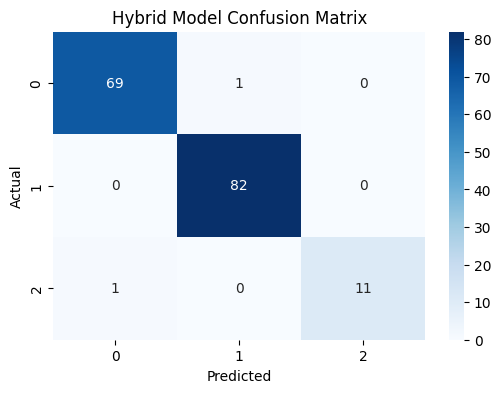

In [ ]:
# Generate Confusion Matrix hybrid
cm = confusion_matrix(ytest, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("Hybrid Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier(
    n_estimators=100,        # কম tree
    learning_rate=0.05,     # slow learning
    max_depth=2,            # shallow tree
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.7,
    random_state=42
)

model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

print("Gradient Boosting Accuracy:", accuracy_score(ytest, y_pred))


Gradient Boosting Accuracy: 0.9878048780487805


In [ ]:
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9878048780487805


In [ ]:
input_data = (
    0, # Name
    1, # Age
    0, # Gender
    1, # TO
    0, # TH
    2, # AH
    1, # BH
    2, # OX2
    2, # OXK
    0, # OX9
    1, # A
    2, # M
    0, # Rickettsia_Suspect
    1, # Acute_typhoid
    0, # Paratyphoid_A
    1  # Paratyphoid_B
)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

# The original 'Typhoid' column has values 0, 1, 2. Let's map these to meaningful labels.
# Assuming 0: Minimal, 1: Negative, 2: Positive based on previous output

if prediction[0] == 0:
    print('The person has Minimal Typhoid')
elif prediction[0] == 1:
    print('The person has Negative Typhoid')
elif prediction[0] == 2:
    print('The person has Positive Typhoid')


[0]
The person has Minimal Typhoid


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle


filename = 'Typhoid  prediction.sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

for column in df.columns:
    print(column)

Name
Age
Gender
TO
TH
AH
BH
OX2
OXK
OX9
A
M
Rickettsia_Suspect
Acute_typhoid 
Paratyphoid_A 
Paratyphoid_B
Typhoid


In [ ]:
# Import ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn import svm

In [ ]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)

print("KNN Accuracy:", accuracy_score(ytest, knn_pred))

KNN Accuracy: 0.9024390243902439


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(
    max_depth=4,          # tree ছোট
    min_samples_split=10, # split করার জন্য min sample
    min_samples_leaf=5,   # leaf-এ min sample
    criterion='gini'
)

dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)

print("Decision Tree Accuracy:", accuracy_score(ytest, dt_pred))


Decision Tree Accuracy: 0.9878048780487805


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(
    n_estimators=100,        # কম tree
    max_depth=5,            # shallow tree
    learning_rate=0.05,     # slow learning
    subsample=0.7,          # data sampling
    colsample_bytree=0.7,   # feature sampling
    reg_alpha=1,            # L1 regularization
    reg_lambda=1,           # L2 regularization
    gamma=1,                # split restriction
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)

print("XGBoost Accuracy:", accuracy_score(ytest, xgb_pred))


XGBoost Accuracy: 0.9878048780487805


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:08:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Classification Report
print("\nXGBClassifier Classification Report:\n", classification_report(ytest,xgb_pred ))


XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      1.00      0.99        82
           2       1.00      0.92      0.96        12

    accuracy                           0.99       164
   macro avg       0.99      0.97      0.98       164
weighted avg       0.99      0.99      0.99       164



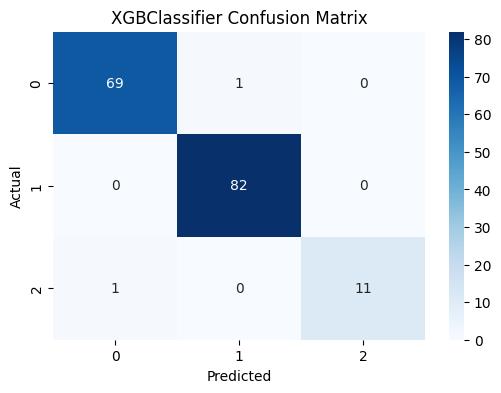

In [ ]:
# Generate Confusion Matrix
cm = confusion_matrix(ytest, xgb_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("XGBClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

logs = LogisticRegression(
    C=0.08,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced'
)

logs.fit(xtrain_scaled, ytrain)
y_pre = logs.predict(xtest_scaled)

print("Accuracy:", accuracy_score(ytest, y_pre))


Accuracy: 0.9329268292682927


In [ ]:
from sklearn.svm import SVC   # SVM
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf', random_state=42)
model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

test_data_accuracy = accuracy_score(ytest, y_pred)
print('Accuracy on test data = ', test_data_accuracy)


Accuracy on test data =  0.9817073170731707


In [ ]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9390243902439024


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

print("Random Forest Accuracy:", accuracy_score(ytest, y_pred))

Random Forest Accuracy: 0.9878048780487805


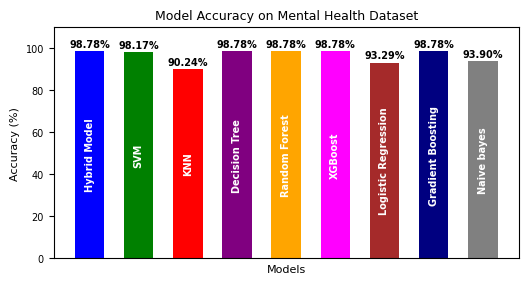

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ["Hybrid Model","SVM", "KNN", "Decision Tree", "Random Forest", "XGBoost", "Logistic Regression", "Gradient Boosting","Naive bayes"]
accuracy = [98.78, 98.17, 90.24, 98.78, 98.78, 98.78, 93.29, 98.78, 93.90]

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'brown','navy', 'gray'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on Mental Health Dataset", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()

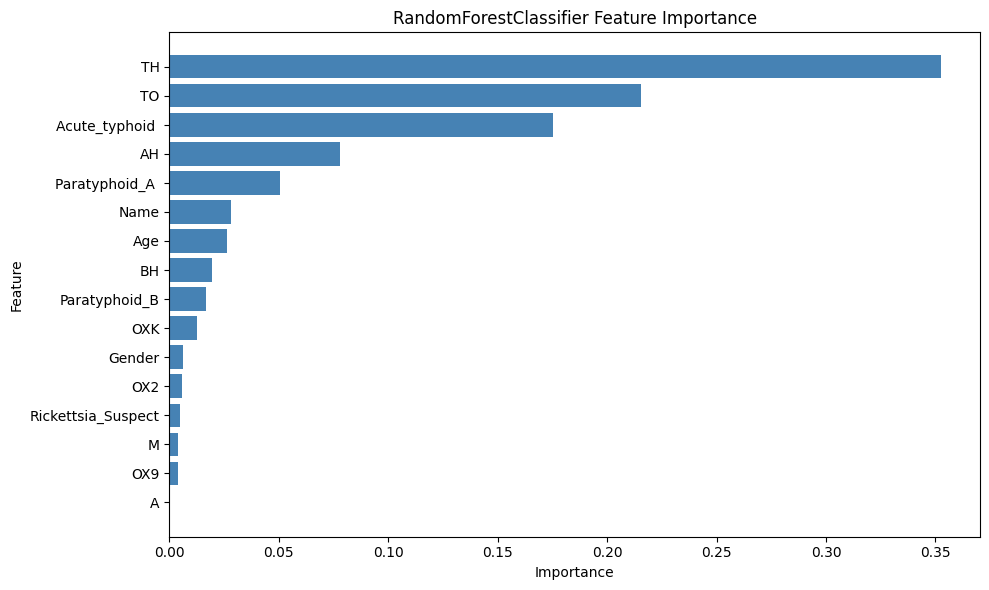

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Get feature importance
# =========================
# Corrected: Use feature_importances_ attribute for RandomForestClassifier
feature_importance = model.feature_importances_
feature_names = xtest.columns

# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
})

# Sort by importance
fi_df = fi_df.sort_values(by="Importance", ascending=True)

# =========================
# Plot
# =========================
plt.figure(figsize=(10, 6))

plt.barh(
    fi_df["Feature"],
    fi_df["Importance"],
    color="steelblue"
)

# Corrected: Update title to reflect the model being used
plt.title("RandomForestClassifier Feature Importance", fontsize=12)
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


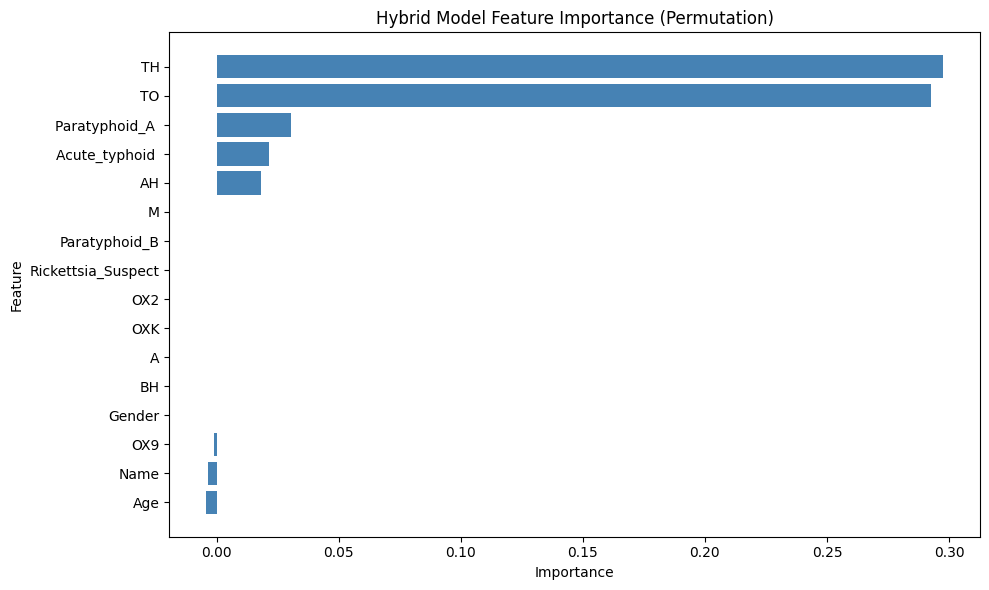

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# =========================
# Permutation Importance
# =========================
result = permutation_importance(
    model,          # 🔥 hybrid model
    xtest,
    ytest,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": xtest.columns,
    "Importance": result.importances_mean
})

# Sort
fi_df = fi_df.sort_values(by="Importance", ascending=True)

# =========================
# Plot
# =========================
plt.figure(figsize=(10, 6))

plt.barh(
    fi_df["Feature"],
    fi_df["Importance"],
    color="steelblue"
)

plt.title("Hybrid Model Feature Importance (Permutation)", fontsize=12)
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


In [ ]:
# =======================
# XAI 4: SHAP (Tree-based Models)
# =======================

import shap


# TreeExplainer works best for tree models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xtrain)

# Summary Plot (Global Explanation)
shap.summary_plot(shap_values, xtrain, feature_names=x.columns)
shap.summary_plot(shap_values, xtrain, feature_names=x.columns, plot_type="bar")



InvalidModelError: Model type not yet supported by TreeExplainer: <class 'str'>

Shape of shap_values (single array): (164, 16, 3)
Shape of xtest.values: (164, 16)


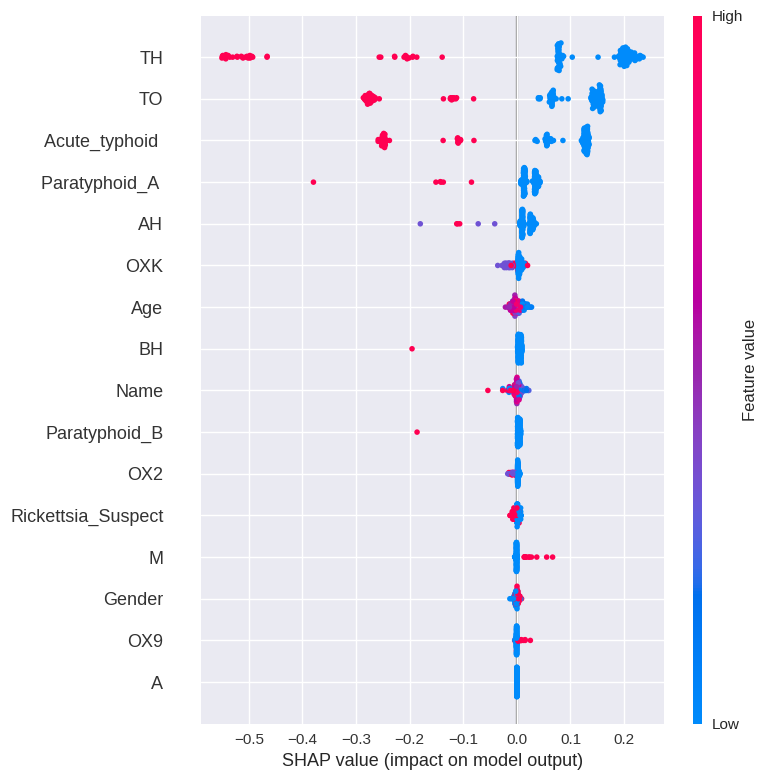

In [ ]:
import shap
import numpy as np # Ensure numpy is imported for shape checks

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xtest)

# Debugging: Print shapes just before the summary_plot call
if isinstance(shap_values, list):
    print(f"Shape of shap_values (list of arrays): {[s.shape for s in shap_values]}")
    print(f"Shape of shap_values[1]: {shap_values[1].shape}")
else:
    # This case is unlikely for a multi-class TreeExplainer, but included for robustness
    print(f"Shape of shap_values (single array): {shap_values.shape}")
print(f"Shape of xtest.values: {xtest.values.shape}")


# SHAP summary (beeswarm) plot
shap.summary_plot(
    shap_values[:, :, 1],   # Correctly select SHAP values for class 1
    xtest.values,     # Convert DataFrame to numpy array
    feature_names=xtest.columns.tolist(), # Explicitly provide feature names
    plot_type="dot"
)

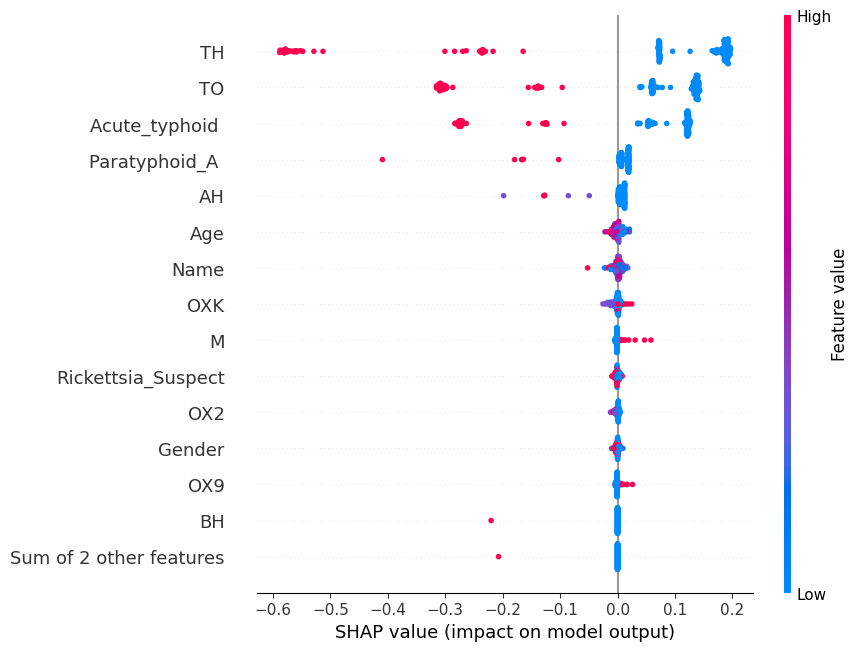

In [42]:
import shap
import matplotlib.pyplot as plt

shap.initjs()

# =========================
# Explainer
# =========================
explainer = shap.Explainer(model, xtest)

shap_values = explainer(xtest)

# =========================
# 🔥 Select ONE class only
# =========================
# class 1 (positive class)
shap_values_class1 = shap_values[..., 1]

# =========================
# Beeswarm Plot
# =========================
shap.plots.beeswarm(
    shap_values_class1,
    max_display=15
)

plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


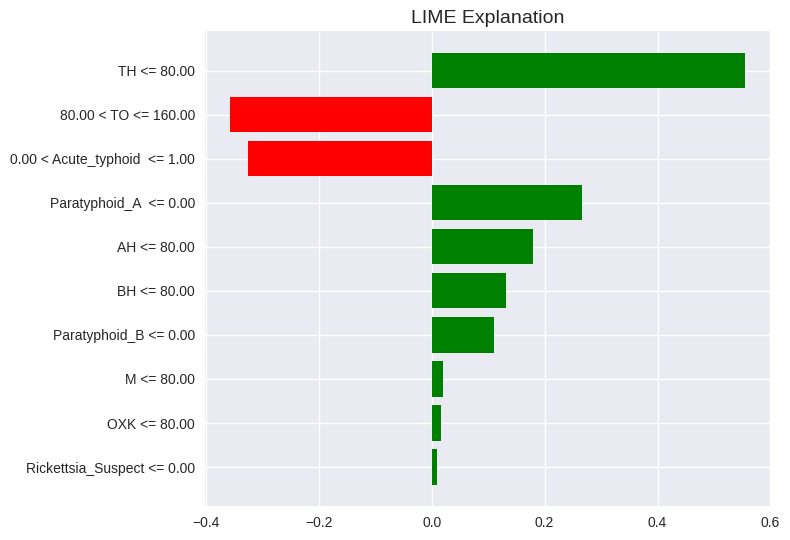

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Feature & class names
feature_names = x.columns.tolist()
class_names = ["Minimal", "Negative", "Positive"]

# Create explainer
explainer = LimeTabularExplainer(
    training_data=np.array(xtrain),
    feature_names=feature_names,
    class_names=class_names,
    mode="classification",
    discretize_continuous=True
)

# Explain one instance
i = 0
exp = explainer.explain_instance(
    data_row=xtest.iloc[i].values,
    predict_fn=model.predict_proba,
    num_features=10
)

# Convert to matplotlib figure
fig = exp.as_pyplot_figure()

# Improve colors & style
plt.title("LIME Explanation", fontsize=14)
plt.tight_layout()

# Save as JPEG
plt.savefig("lime_explanation.jpeg", dpi=300, bbox_inches="tight")
plt.show()


NameError: name 'X_test' is not defined

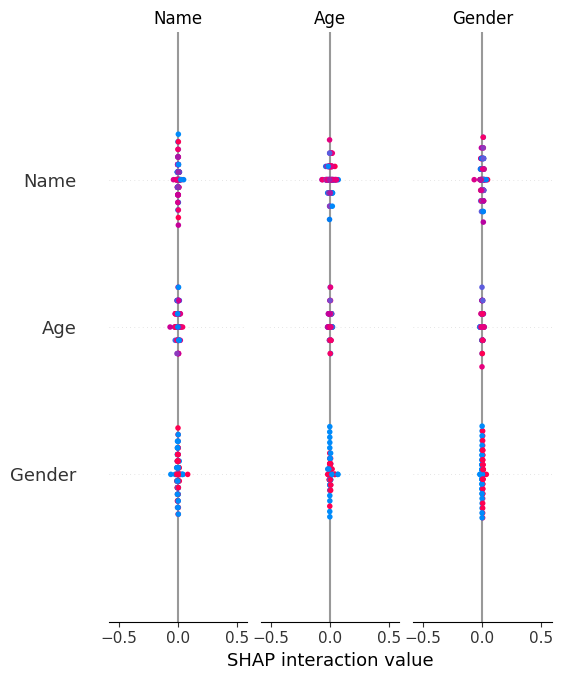

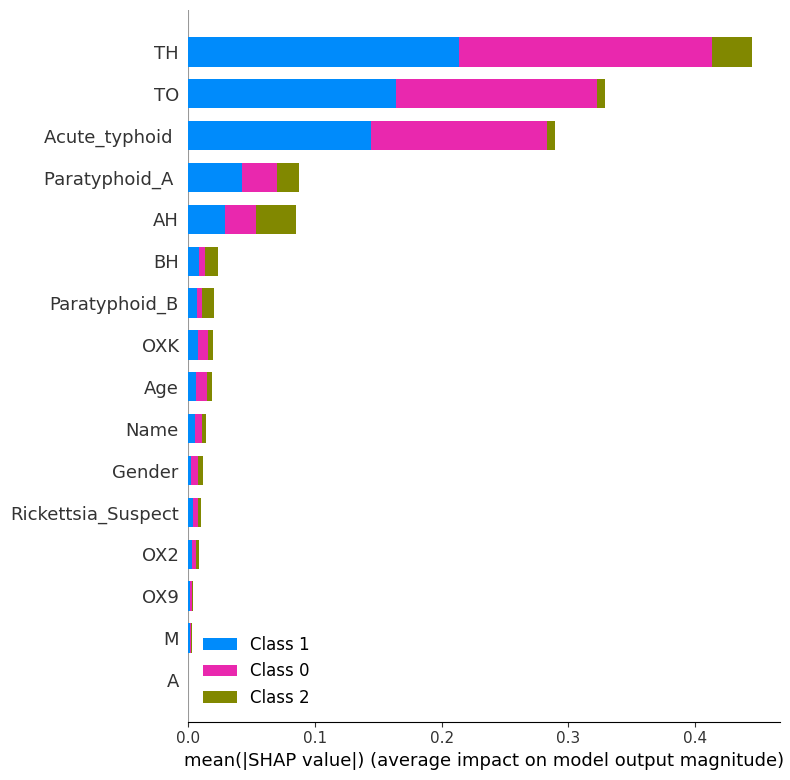

In [ ]:
# =======================
# XAI 4: SHAP (Tree-based Models)
# =======================

import shap
from sklearn.ensemble import RandomForestClassifier

# Re-initialize and fit RandomForestClassifier to ensure 'model' is a tree-based model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

# TreeExplainer works best for tree models
explainer = shap.TreeExplainer(model)

# Use a small sample for speed
X_sample = xtrain.sample(100, random_state=42)

shap_values = explainer.shap_values(X_sample)

# Summary Plot (Global Explanation)
shap.summary_plot(shap_values, X_sample, feature_names=x.columns)
shap.summary_plot(shap_values, xtest, plot_type="bar")

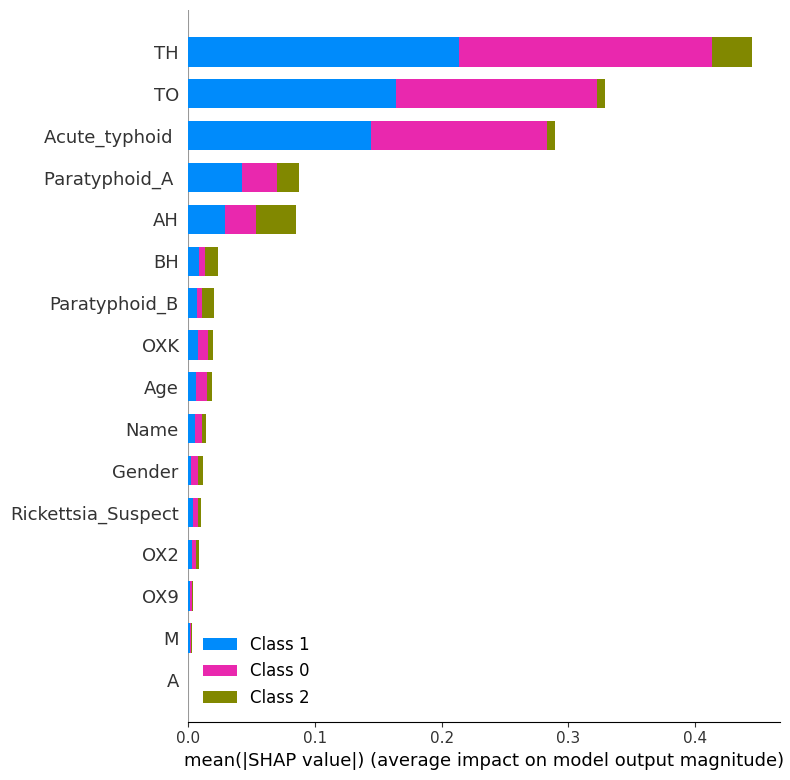

In [ ]:
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=x.columns,
    plot_type="bar"
)

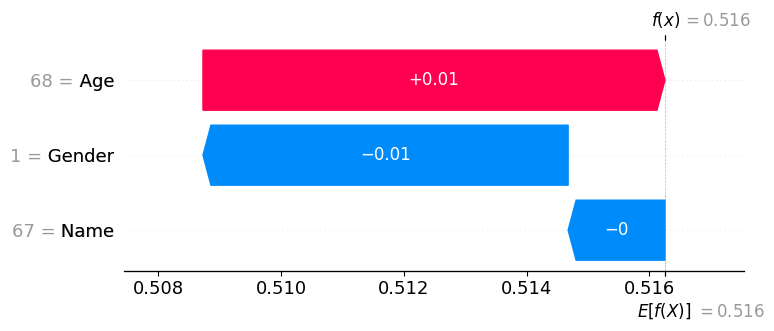

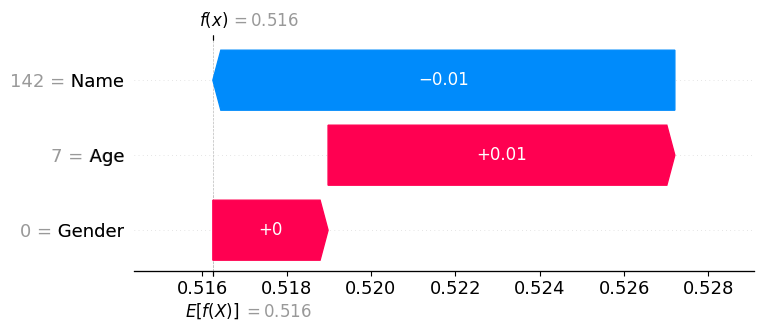

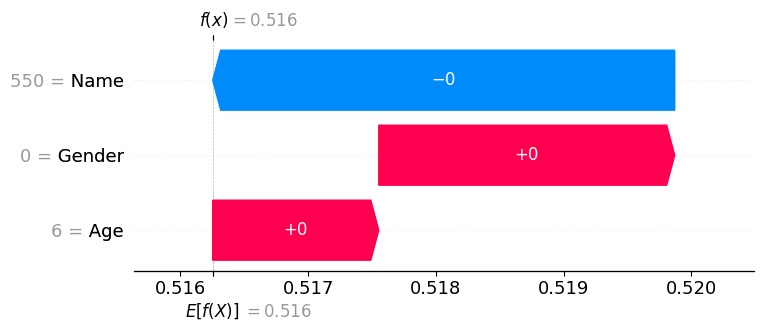

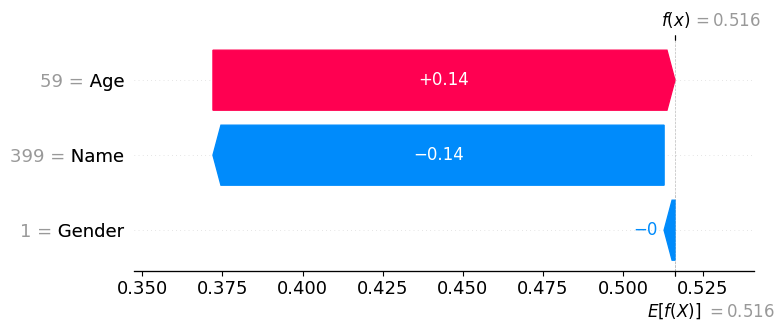

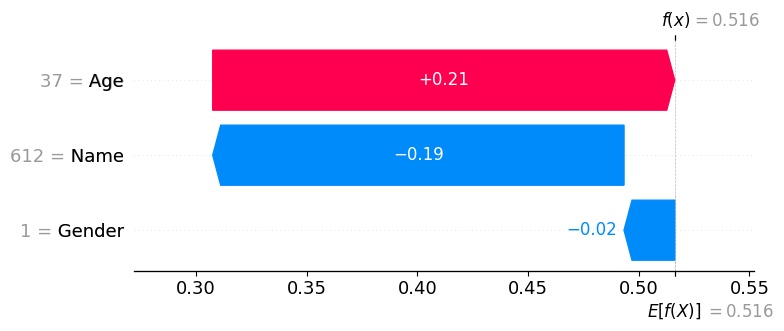

In [ ]:
import shap

explainer = shap.TreeExplainer(model)

# SHAP values for all samples in x
# For multi-class models, shap_values is typically a list of arrays, one for each class.
# Each array shap_values[k] will have shape (num_samples, num_features).
multi_class_shap_values = explainer.shap_values(x)

# Choose a subset of samples to plot waterfall for, e.g., the first 5 or 10.
# Plotting for all 655 samples is generally not practical and can freeze your notebook.
num_samples_to_plot = min(len(x), 5) # Plotting for a maximum of 5 samples

for i in range(num_samples_to_plot):
    # Select the target class to explain. For example, class 0 (Minimal Typhoid).
    # You can change this to 1 for Negative or 2 for Positive, or loop through classes.
    target_class_idx = 0

    # Get the SHAP values for the current sample (i) and the chosen target class
    # This will be a 1D array of shape (num_features,)
    sample_shap_values = multi_class_shap_values[target_class_idx][i]

    # Get the base value (expected value) for the chosen target class
    base_value = explainer.expected_value[target_class_idx]

    # Get the feature values for the current sample
    sample_feature_values = x.iloc[i]

    # Create an Explanation object for the waterfall plot
    explanation = shap.Explanation(
        values=sample_shap_values,
        base_values=base_value,
        data=sample_feature_values,
        feature_names=x.columns.tolist()
    )

    # Generate the waterfall plot
    shap.waterfall_plot(explanation)



Top Important Features:

           Feature  Importance
4               TH    0.352696
3               TO    0.215701
13  Acute_typhoid     0.175055
5               AH    0.077822
14  Paratyphoid_A     0.050789
0             Name    0.028066
1              Age    0.026274
6               BH    0.019290
15   Paratyphoid_B    0.016744
8              OXK    0.012712


/tmp/ipython-input-2864147093.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


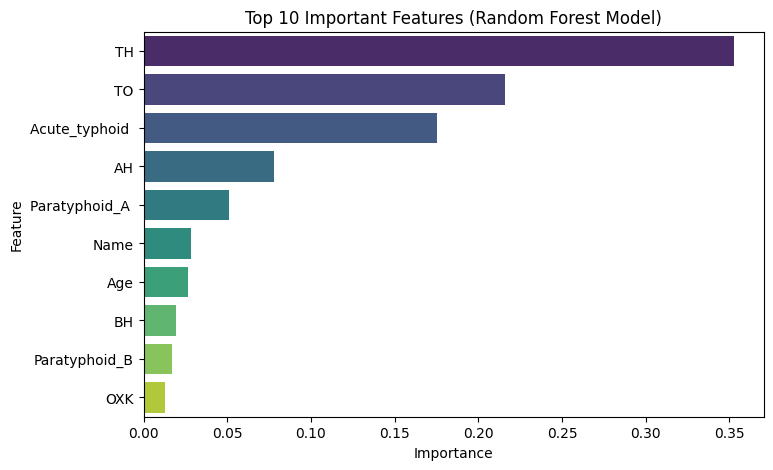

In [ ]:

# XAI 1: Feature Importance (Tree-based Models)


# Re-initialize and fit RandomForestClassifier to ensure 'model' is a tree-based model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

feature_importance = model.feature_importances_
feature_names = x.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop Important Features:\n")
print(importance_df.head(10))

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title("Top 10 Important Features (Random Forest Model)")
plt.show()


Logistic Regression Feature Effects:

               Feature  Coefficient
13      Acute_typhoid      0.874178
14      Paratyphoid_A      0.664108
3                   TO     0.528508
4                   TH     0.307661
12  Rickettsia_Suspect     0.166940
0                 Name     0.021585
1                  Age     0.016347
7                  OX2     0.008151
8                  OXK     0.003336
10                   A     0.000000
15       Paratyphoid_B    -0.053806
6                   BH    -0.053806
2               Gender    -0.110301
9                  OX9    -0.221039
11                   M    -0.325388
5                   AH    -0.536564


/tmp/ipython-input-1787090992.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


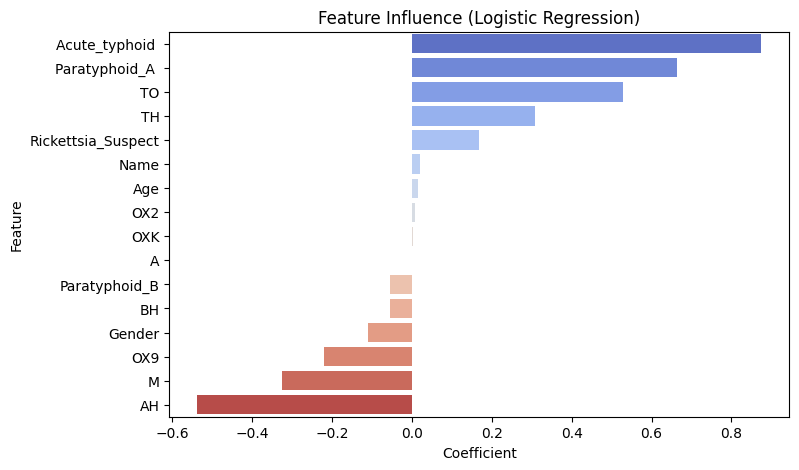

In [ ]:

# XAI 2: Logistic Regression Coefficients


coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logs.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Feature Effects:\n")
print(coef_df)

plt.figure(figsize=(8,5))
sns.barplot(
    data=coef_df,
    x='Coefficient',
    y='Feature',
    palette='coolwarm'
)
plt.title("Feature Influence (Logistic Regression)")
plt.show()



Permutation Importance:

               Feature  Importance
4                   TH    0.297561
3                   TO    0.292683
14      Paratyphoid_A     0.030488
13      Acute_typhoid     0.021341
5                   AH    0.018293
7                  OX2    0.000000
6                   BH    0.000000
2               Gender    0.000000
12  Rickettsia_Suspect    0.000000
11                   M    0.000000


/tmp/ipython-input-1833077469.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


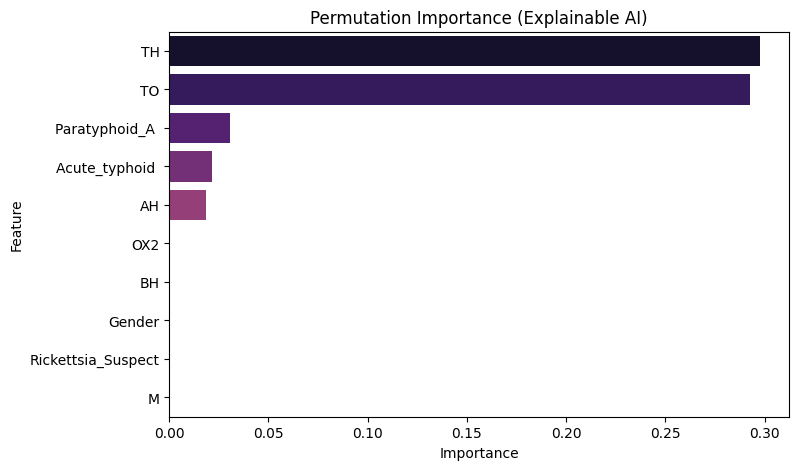

In [ ]:

# XAI 3: Permutation Importance (Model-Agnostic)


from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    model,
    xtest,
    ytest,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

perm_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nPermutation Importance:\n")
print(perm_df.head(10))

plt.figure(figsize=(8,5))
sns.barplot(
    data=perm_df.head(10),
    x='Importance',
    y='Feature',
    palette='magma'
)
plt.title("Permutation Importance (Explainable AI)")
plt.show()


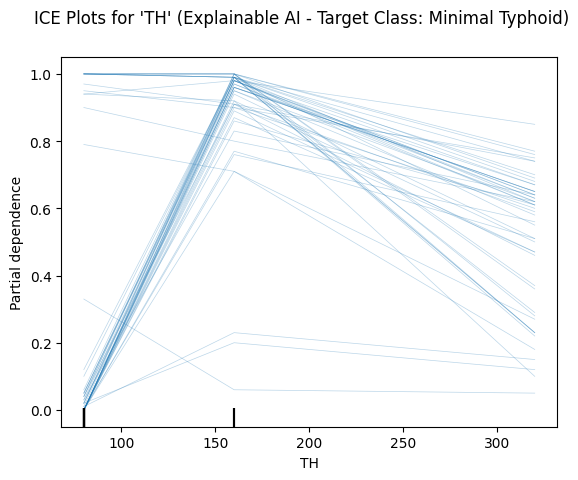

In [ ]:

# XAI 5: ICE (Individual Conditional Expectation)


from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Select an actual input feature to plot (e.g., 'TH' or 'TO' from previous analysis)
# The target variable 'Typhoid' is not a valid feature for PDP/ICE plots.
features_for_ice = [ 'TH'] # Example: using 'TH' as an important feature

# For multi-class classification, the 'target' parameter must be specified
# to indicate which class's partial dependence to plot.
# Assuming 0: Minimal, 1: Negative, 2: Positive from previous output mapping
PartialDependenceDisplay.from_estimator(
    model,
    xtrain,
    features_for_ice,
    kind='individual',   # ICE
    subsample=50,
    grid_resolution=20,
    target=0 # Specify the target class (e.g., 0 for 'Minimal Typhoid')
)

plt.suptitle("ICE Plots for 'TH' (Explainable AI - Target Class: Minimal Typhoid)")
plt.show()

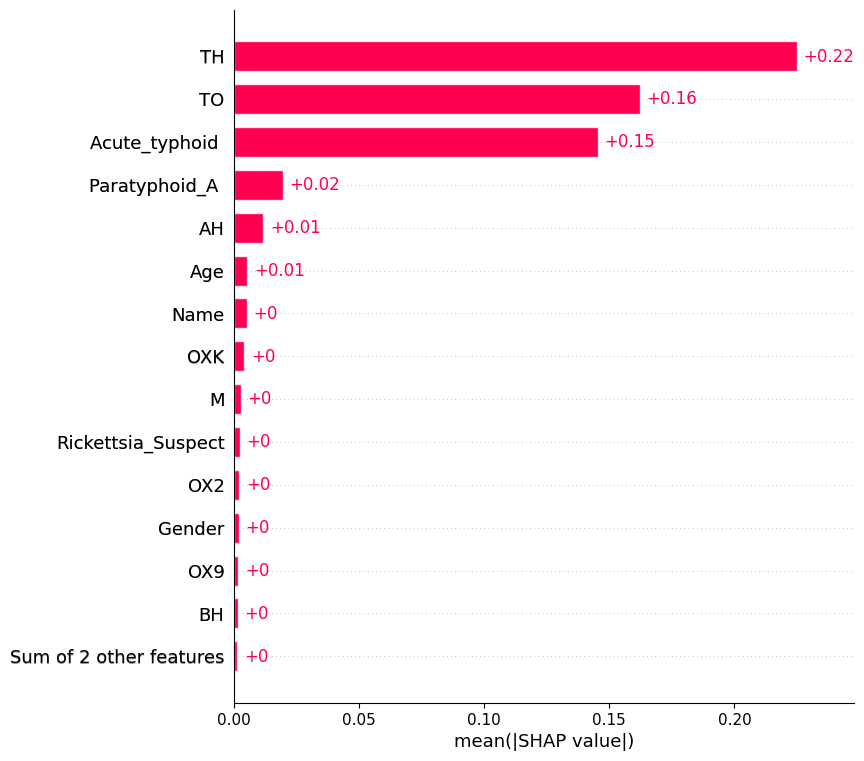

In [43]:
import shap
import matplotlib.pyplot as plt

# Explainer
explainer = shap.Explainer(model, xtest)
shap_values = explainer(xtest)

# 🔥 Single class select (binary / multiclass)
shap_values_class1 = shap_values[..., 1]

# Feature Importance Bar Plot
shap.plots.bar(
    shap_values_class1,
    max_display=15
)

plt.show()


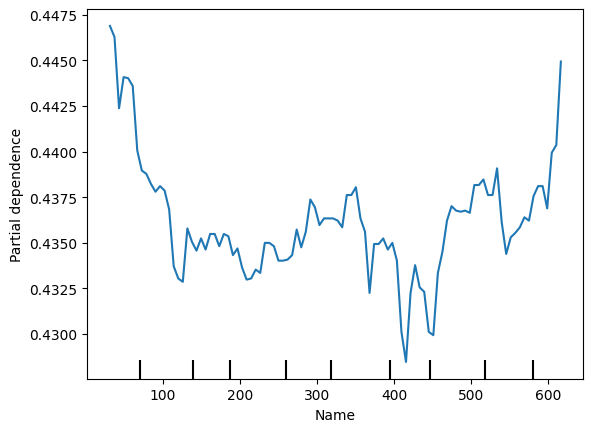

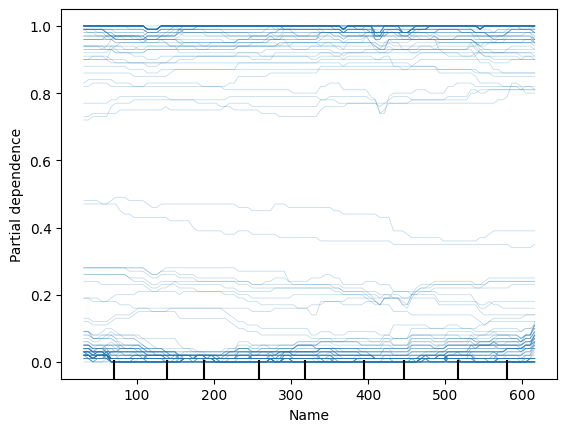

In [ ]:

# PDP & ICE
PartialDependenceDisplay.from_estimator(
    model, xtest, features=[0], feature_names=x.columns, target=0
)
plt.show()

PartialDependenceDisplay.from_estimator(
    model, xtest, features=[0], kind="individual", feature_names=x.columns, target=0
)
plt.show()


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1170ceb310e095addb8ded3de92166c1b469118e7d9b0bb82d5914e57e3c76d5
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


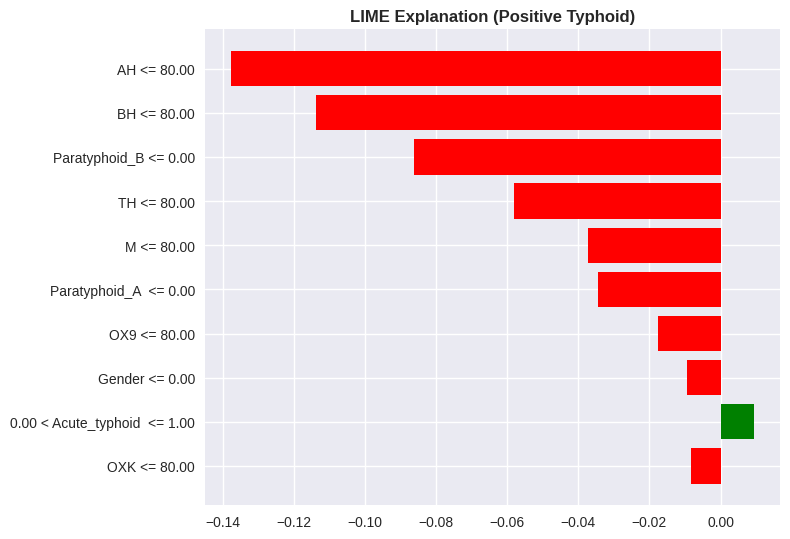

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Convert train & test data to numpy
X_train_np = xtrain.values
X_test_np = xtest.values

# Class names
class_names = ["Minimal", "Negative", "Positive"]

# Create explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=x.columns.tolist(),
    class_names=class_names,
    mode="classification"
)

# Explain one instance
i = 0

exp = lime_explainer.explain_instance(
    data_row=X_test_np[i],
    predict_fn=model.predict_proba,
    num_features=10,
    labels=[2]   # 👉 Positive Typhoid class (change if needed)
)

# ===== Better colored plot =====
plt.style.use("seaborn-v0_8")   # nicer color theme

fig = exp.as_pyplot_figure(label=2)
plt.title("LIME Explanation (Positive Typhoid)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


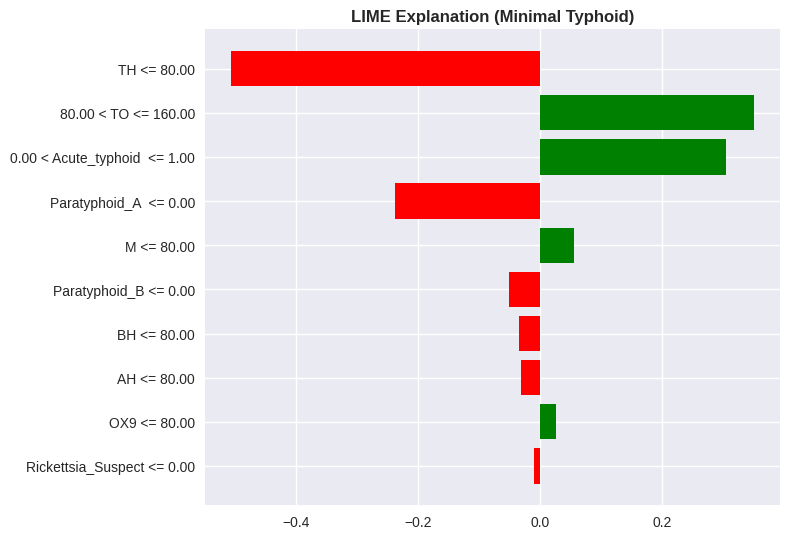

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Convert train & test data to numpy
X_train_np = xtrain.values
X_test_np = xtest.values

# Class names
class_names = ["Minimal", "Negative", "Positive"]

# Create explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=x.columns.tolist(),
    class_names=class_names,
    mode="classification"
)

# Explain one instance
i = 0

exp = lime_explainer.explain_instance(
    data_row=X_test_np[i],
    predict_fn=model.predict_proba,
    num_features=10,
    labels=[0]   # 👉 Minimal Typhoid (label 0)
)

# ===== Better colored plot =====
plt.style.use("seaborn-v0_8")

fig = exp.as_pyplot_figure(label=0)
plt.title("LIME Explanation (Minimal Typhoid)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


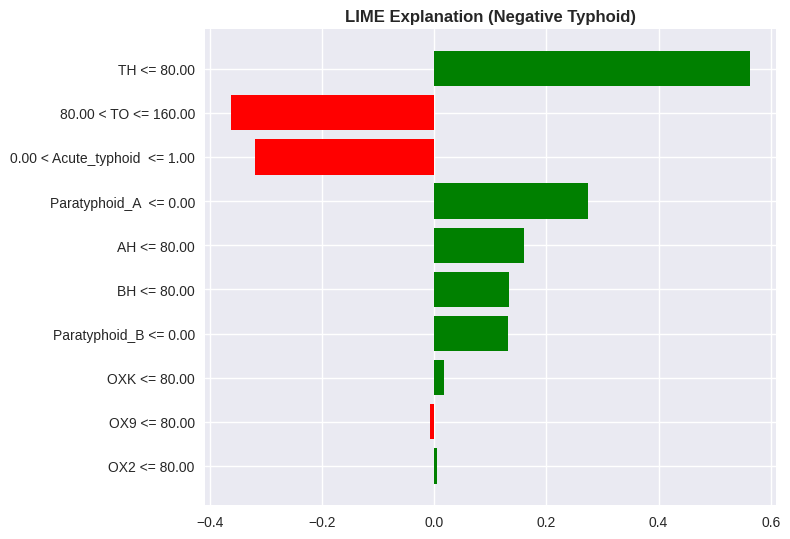

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Convert train & test data to numpy
X_train_np = xtrain.values
X_test_np = xtest.values

# Class names
class_names = ["Minimal", "Negative", "Positive"]

# Create explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=x.columns.tolist(),
    class_names=class_names,
    mode="classification"
)

# Explain one instance
i = 0

exp = lime_explainer.explain_instance(
    data_row=X_test_np[i],
    predict_fn=model.predict_proba,
    num_features=10,
    labels=[1]   # 👉 Negative Typhoid (label 1)
)

# ===== Better colored plot =====
plt.style.use("seaborn-v0_8")

fig = exp.as_pyplot_figure(label=1)
plt.title("LIME Explanation (Negative Typhoid)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
